In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [3]:
# Row columnの表示設定
pd.set_option('display.max_columns', None) # 表示する列数を無制限にする
pd.set_option('display.width', None) # 表示する幅を無制限にする
pd.set_option('display.max_rows', 20) # 表示する行数を20行にする
pd.set_option('display.float_format', lambda x: '%.3f' % x) # 小数点以下3桁まで表示する

pd.describe_option()


compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: False]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints a

In [4]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
df = pd.concat([train, test], ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL       65.000     8450   Pave   NaN      Reg   
1        2          20       RL       80.000     9600   Pave   NaN      Reg   
2        3          60       RL       68.000    11250   Pave   NaN      IR1   
3        4          70       RL       60.000     9550   Pave   NaN      IR1   
4        5          60       RL       84.000    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM       21.000     1936   Pave   NaN      Reg   
2915  2916         160       RM       21.000     1894   Pave   NaN      Reg   
2916  2917          20       RL      160.000    20000   Pave   NaN      Reg   
2917  2918          85       RL       62.000    10441   Pave   NaN      Reg   
2918  2919          60       RL       74.000     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
2914       Norm    Twnhs     2Story            4            7       1970   
2915       Norm   TwnhsE     2Story            4            5       1970   
2916       Norm     1Fam     1Story            5            7       1960   
2917       Norm     1Fam     SFoyer            5            5       1992   
2918       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
2914          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
2915          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
2916          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
2917          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
2918          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0        196.000        Gd        TA      PConc       Gd       TA   
1          0.000        TA        TA     CBlock       Gd       TA   
2        162.000        Gd        TA      PConc       Gd       TA   
3          0.000        TA        TA     BrkTil       TA       Gd   

「ignore_index=True」とすることで、indexを振り直すことができる。

### 具体例で確認

```python
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2]}, index=[0, 1])
df2 = pd.DataFrame({'A': [3, 4]}, index=[0, 1])

result = pd.concat([df1, df2])
print(result)
```

#### 出力（デフォルトの `ignore_index=False`）

```
   A
0  1
1  2
0  3   ← インデックスが重複！
1  4
```

#### 出力（`ignore_index=True` を使うと）

```
   A
0  1
1  2
2  3
3  4
```

## EDA

In [6]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ     706.000          Unf       0.000    150.000      856.000   
1          ALQ     978.000          Unf       0.000    284.000     1262.000   
2          GLQ     486.000          Unf       0.000    434.000      920.000   
3          ALQ     216.000          Unf       0.000    540.000      756.000   
4          GLQ     655.000          Unf       0.000    490.000     1145.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710         1.000         0.000         2         1             3   
1       1262         0.000         1.000         2         0             3   
2       1786         1.000         0.000         2         1             3   
3       1717         1.000         0.000         1         0             3   
4       2198         1.000         0.000         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_cols = dataframe.select_dtypes(include=['number']).columns  
    print(dataframe[numeric_cols].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub

In [8]:
# 特徴量の分類
def grab_col_names(dataframe, cat_th=1, car_th=20):
    # "0"と定義することで、Object型のデータだけを識別できる
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    # cat_th(categorical threshold): 数値->カテゴリへの変換しきい値
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    # car_th(cardinality threshold): カテゴリ変数であるが、ユニーク値が多すぎる（識別子など）
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

"""
cat_cols: カテゴリ変数（object型 + 数値だけどカテゴリ）
num_cols: 数値変数（本当に数値として扱いたい列だけに絞る）
cat_but_car: カテゴリ変数であるが、ユニーク値が多すぎる（識別子など）
num_but_cat: 数値変数であるが、カテゴリ変数として扱いたいもの
"""

'\ncat_cols: カテゴリ変数（object型 + 数値だけどカテゴリ）\nnum_cols: 数値変数（本当に数値として扱いたい列だけに絞る）\ncat_but_car: カテゴリ変数であるが、ユニーク値が多すぎる（識別子など）\nnum_but_cat: 数値変数であるが、カテゴリ変数として扱いたいもの\n'

■ cat_but_carが必要な理由
- ユニーク値が数千件 → One-Hotしたら列数が数千列！
- そうなると：
  - メモリ効率が悪い
  - モデルが過学習しやすい
  - 学習時間が激増

■ num_but_cat
- cat_th=1 -> nunique() < 1
- つまり、ユニークな値がない列だけがnum_but_catに入る
- ただ、ほとんどありえない
  - すべてNanや同じ値だけの列など
- ので、、num_but_catは空になるケースが多い


In [9]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 42
num_cols: 38
cat_but_car: 1
num_but_cat: 0


In [10]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
cat_but_car

['Neighborhood']

In [13]:
num_but_cat

[]

## カテゴリ変数の分析

In [14]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({
        col_name: dataframe[col_name].value_counts(), # その値が何回出現しているか？
        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe) # 全体における割合
    }))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
        plt.xticks(rotation=45) 

          MSZoning  Ratio
MSZoning                 
RL            2265 77.595
RM             460 15.759
FV             139  4.762
RH              26  0.891
C (all)         25  0.856
##########################################


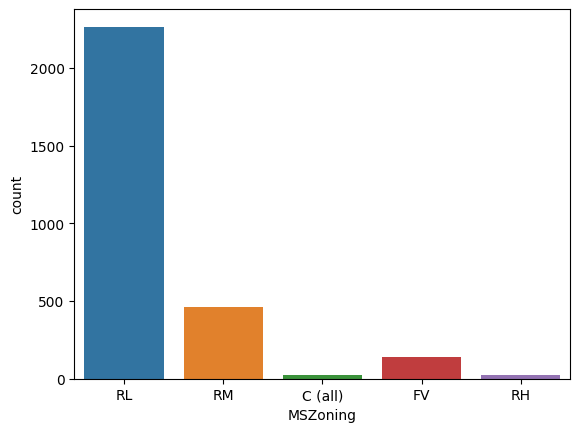

        Street  Ratio
Street               
Pave      2907 99.589
Grvl        12  0.411
##########################################


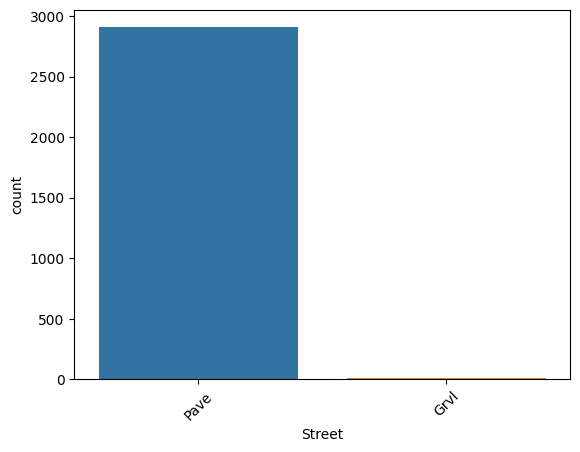

       Alley  Ratio
Alley              
Grvl     120  4.111
Pave      78  2.672
##########################################


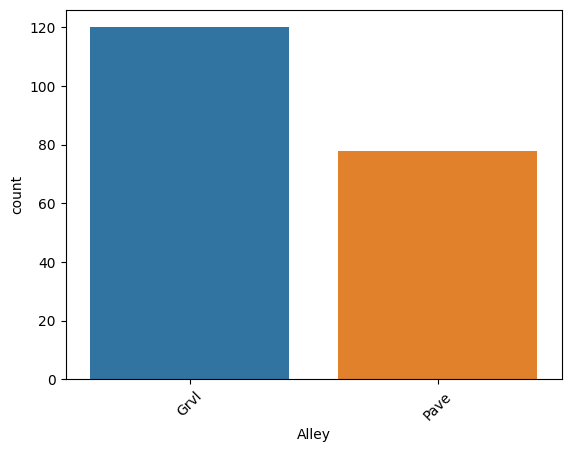

          LotShape  Ratio
LotShape                 
Reg           1859 63.686
IR1            968 33.162
IR2             76  2.604
IR3             16  0.548
##########################################


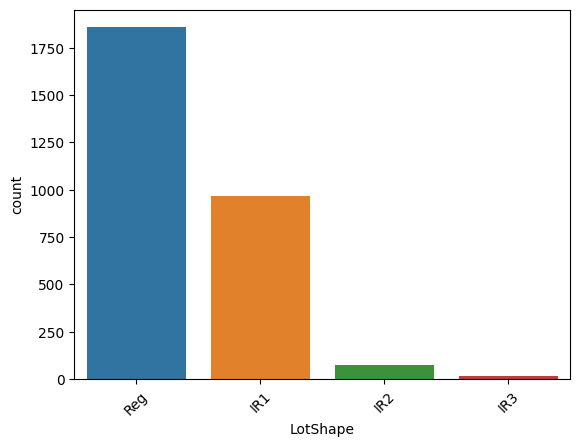

             LandContour  Ratio
LandContour                    
Lvl                 2622 89.825
HLS                  120  4.111
Bnk                  117  4.008
Low                   60  2.055
##########################################


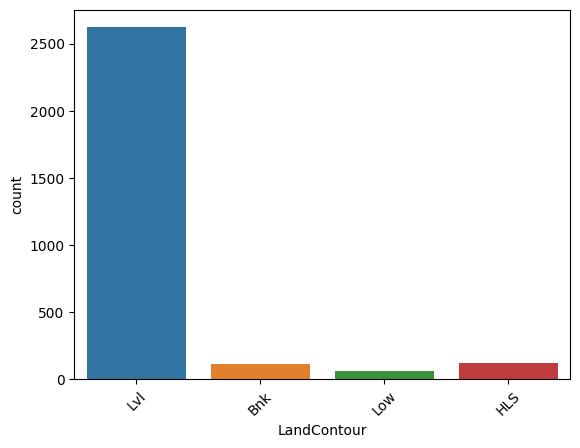

           Utilities  Ratio
Utilities                  
AllPub          2916 99.897
NoSeWa             1  0.034
##########################################


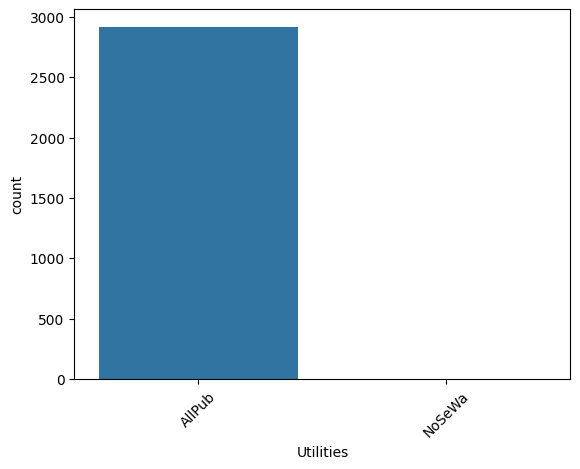

           LotConfig  Ratio
LotConfig                  
Inside          2133 73.073
Corner           511 17.506
CulDSac          176  6.029
FR2               85  2.912
FR3               14  0.480
##########################################


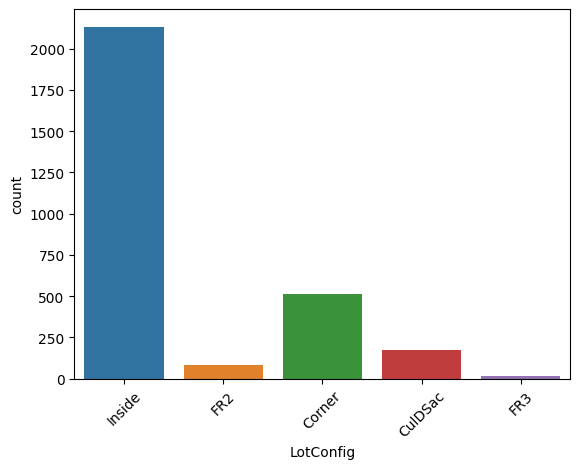

           LandSlope  Ratio
LandSlope                  
Gtl             2778 95.170
Mod              125  4.282
Sev               16  0.548
##########################################


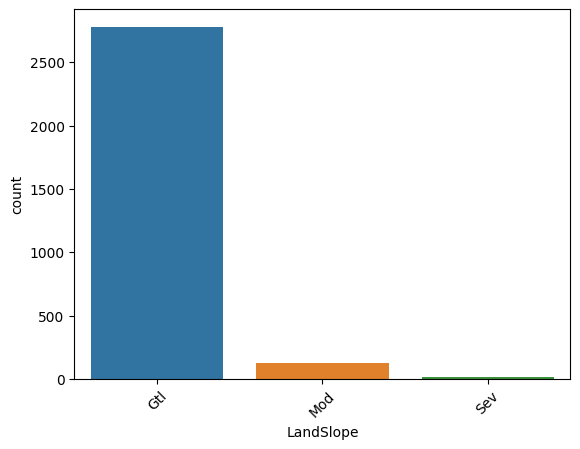

            Condition1  Ratio
Condition1                   
Norm              2511 86.023
Feedr              164  5.618
Artery              92  3.152
RRAn                50  1.713
PosN                39  1.336
RRAe                28  0.959
PosA                20  0.685
RRNn                 9  0.308
RRNe                 6  0.206
##########################################


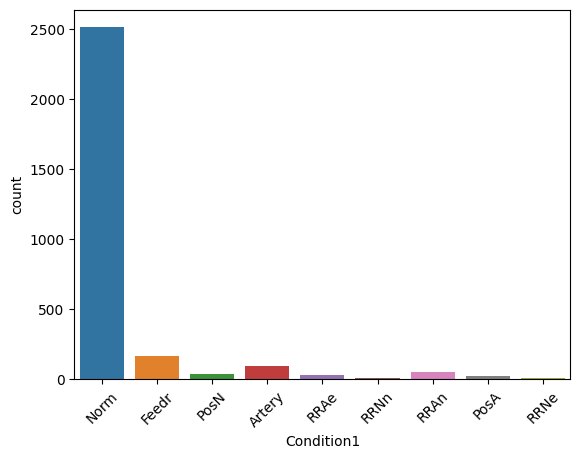

            Condition2  Ratio
Condition2                   
Norm              2889 98.972
Feedr               13  0.445
Artery               5  0.171
PosN                 4  0.137
PosA                 4  0.137
RRNn                 2  0.069
RRAn                 1  0.034
RRAe                 1  0.034
##########################################


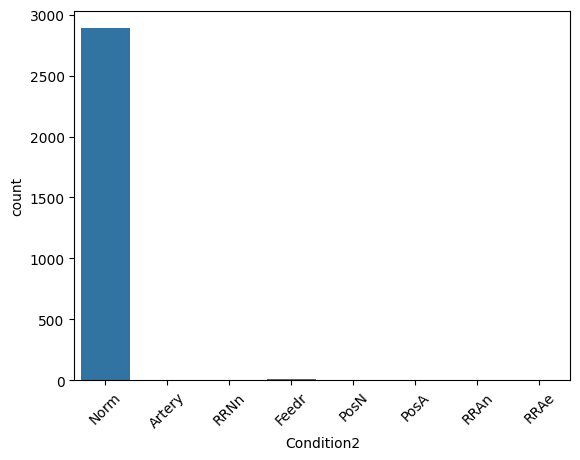

          BldgType  Ratio
BldgType                 
1Fam          2425 83.076
TwnhsE         227  7.777
Duplex         109  3.734
Twnhs           96  3.289
2fmCon          62  2.124
##########################################


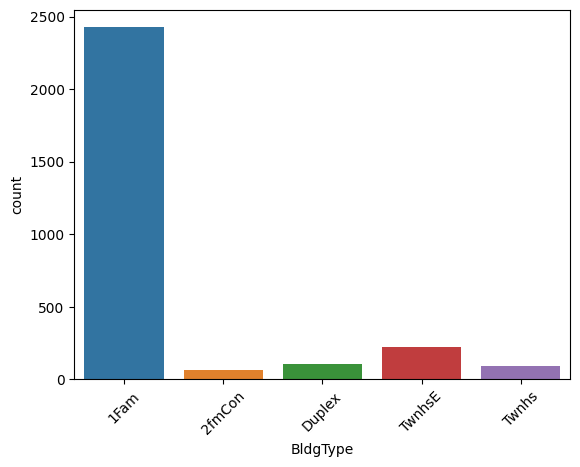

            HouseStyle  Ratio
HouseStyle                   
1Story            1471 50.394
2Story             872 29.873
1.5Fin             314 10.757
SLvl               128  4.385
SFoyer              83  2.843
2.5Unf              24  0.822
1.5Unf              19  0.651
2.5Fin               8  0.274
##########################################


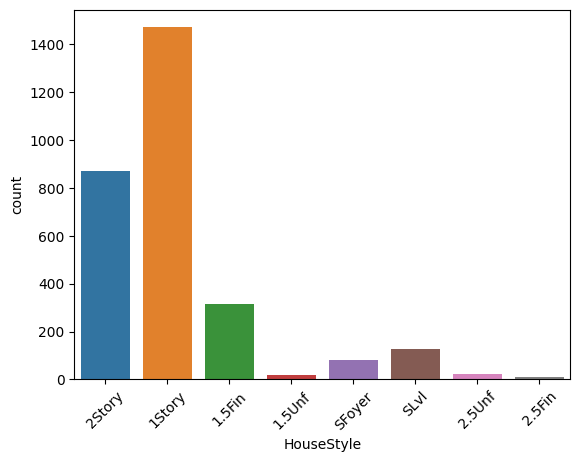

           RoofStyle  Ratio
RoofStyle                  
Gable           2310 79.137
Hip              551 18.876
Gambrel           22  0.754
Flat              20  0.685
Mansard           11  0.377
Shed               5  0.171
##########################################


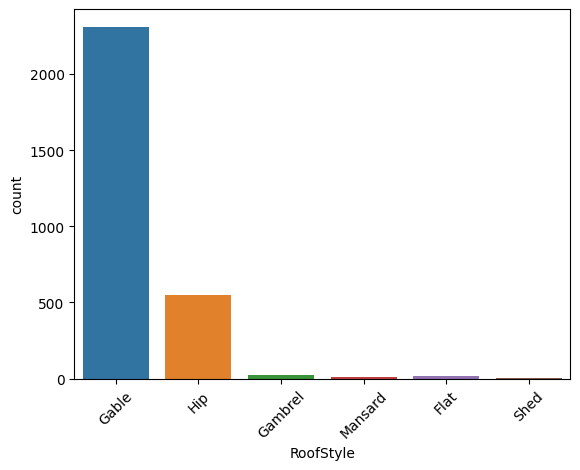

          RoofMatl  Ratio
RoofMatl                 
CompShg       2876 98.527
Tar&Grv         23  0.788
WdShake          9  0.308
WdShngl          7  0.240
Metal            1  0.034
Membran          1  0.034
Roll             1  0.034
ClyTile          1  0.034
##########################################


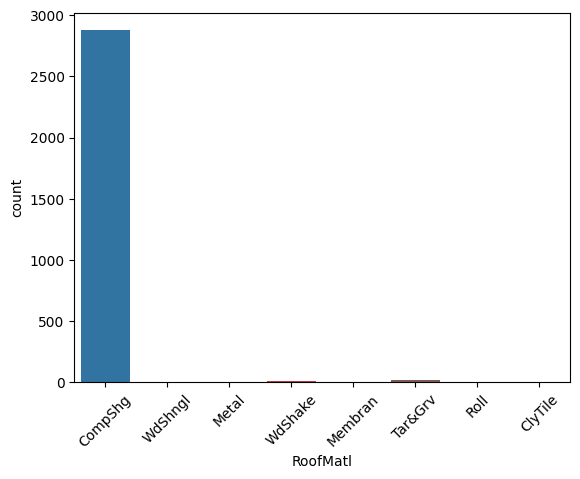

             Exterior1st  Ratio
Exterior1st                    
VinylSd             1025 35.115
MetalSd              450 15.416
HdBoard              442 15.142
Wd Sdng              411 14.080
Plywood              221  7.571
CemntBd              126  4.317
BrkFace               87  2.980
WdShing               56  1.918
AsbShng               44  1.507
Stucco                43  1.473
BrkComm                6  0.206
AsphShn                2  0.069
Stone                  2  0.069
CBlock                 2  0.069
ImStucc                1  0.034
##########################################


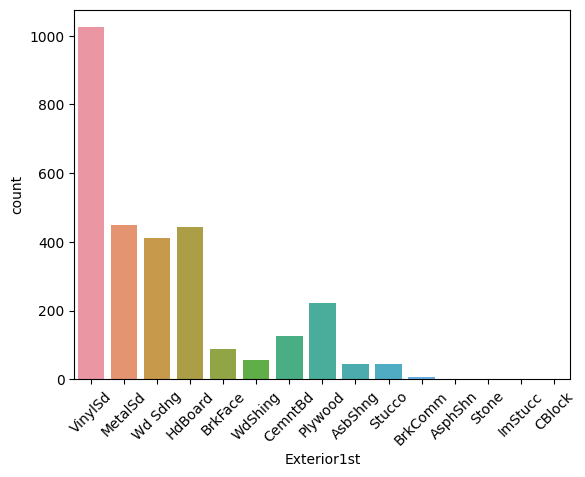

             Exterior2nd  Ratio
Exterior2nd                    
VinylSd             1014 34.738
MetalSd              447 15.313
HdBoard              406 13.909
Wd Sdng              391 13.395
Plywood              270  9.250
CmentBd              126  4.317
Wd Shng               81  2.775
BrkFace               47  1.610
Stucco                47  1.610
AsbShng               38  1.302
Brk Cmn               22  0.754
ImStucc               15  0.514
Stone                  6  0.206
AsphShn                4  0.137
CBlock                 3  0.103
Other                  1  0.034
##########################################


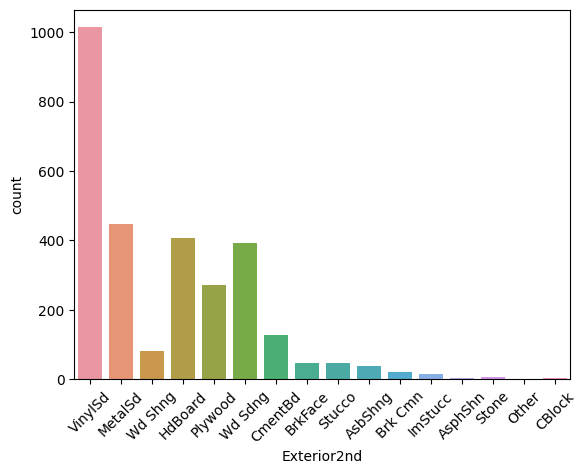

            MasVnrType  Ratio
MasVnrType                   
BrkFace            879 30.113
Stone              249  8.530
BrkCmn              25  0.856
##########################################


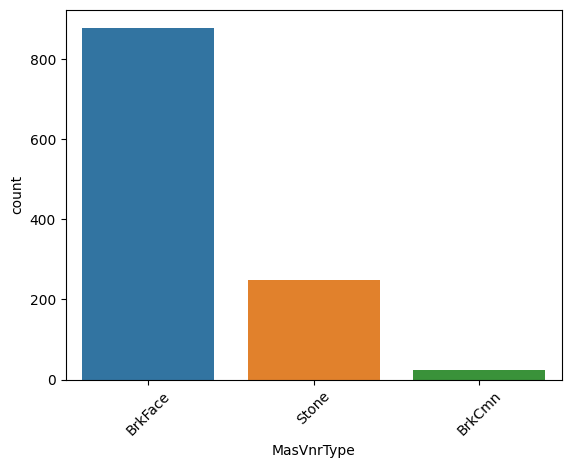

           ExterQual  Ratio
ExterQual                  
TA              1798 61.596
Gd               979 33.539
Ex               107  3.666
Fa                35  1.199
##########################################


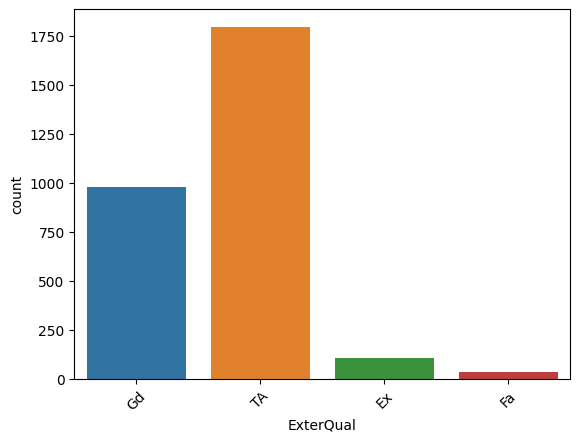

           ExterCond  Ratio
ExterCond                  
TA              2538 86.948
Gd               299 10.243
Fa                67  2.295
Ex                12  0.411
Po                 3  0.103
##########################################


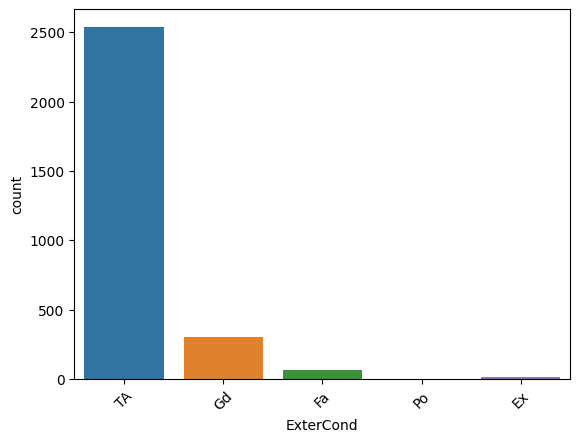

            Foundation  Ratio
Foundation                   
PConc             1308 44.810
CBlock            1235 42.309
BrkTil             311 10.654
Slab                49  1.679
Stone               11  0.377
Wood                 5  0.171
##########################################


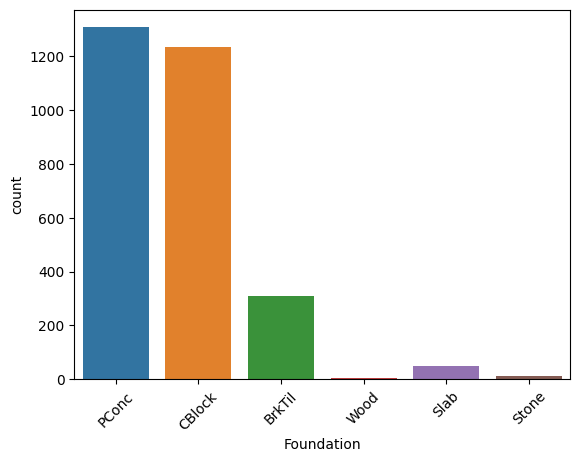

          BsmtQual  Ratio
BsmtQual                 
TA            1283 43.953
Gd            1209 41.418
Ex             258  8.839
Fa              88  3.015
##########################################


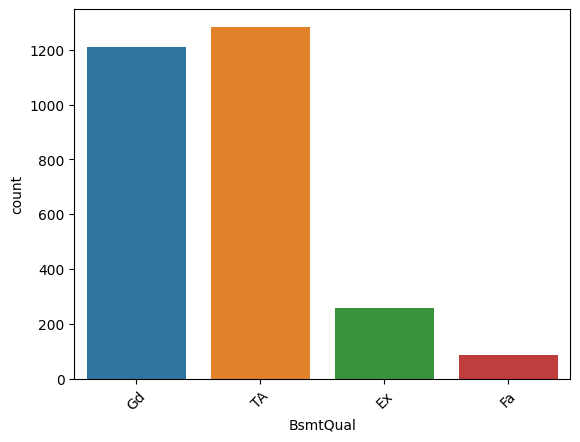

          BsmtCond  Ratio
BsmtCond                 
TA            2606 89.277
Gd             122  4.180
Fa             104  3.563
Po               5  0.171
##########################################


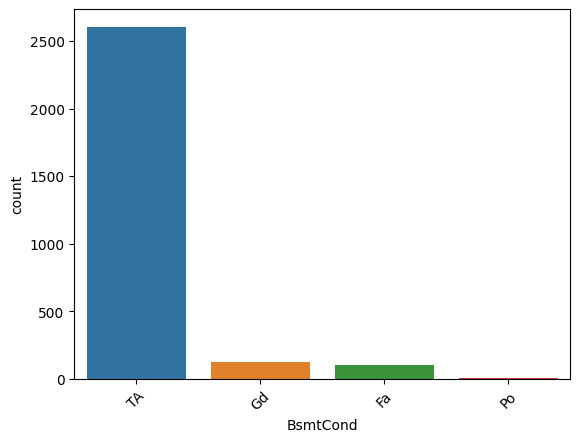

              BsmtExposure  Ratio
BsmtExposure                     
No                    1904 65.228
Av                     418 14.320
Gd                     276  9.455
Mn                     239  8.188
##########################################


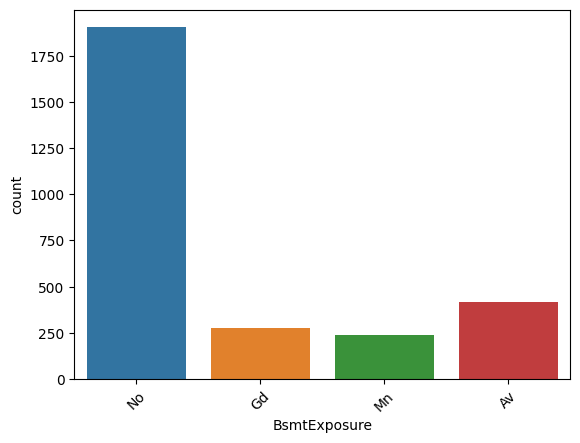

              BsmtFinType1  Ratio
BsmtFinType1                     
Unf                    851 29.154
GLQ                    849 29.085
ALQ                    429 14.697
Rec                    288  9.866
BLQ                    269  9.215
LwQ                    154  5.276
##########################################


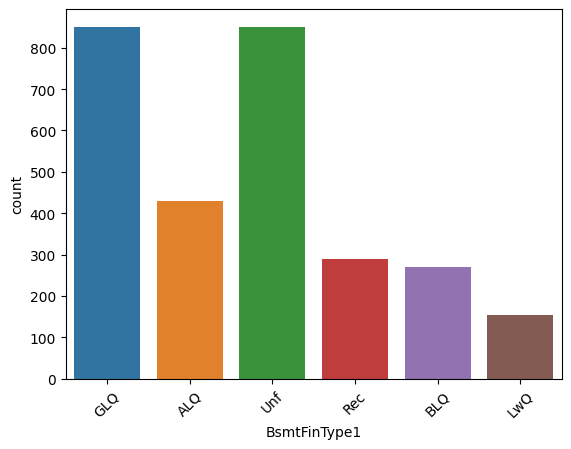

              BsmtFinType2  Ratio
BsmtFinType2                     
Unf                   2493 85.406
Rec                    105  3.597
LwQ                     87  2.980
BLQ                     68  2.330
ALQ                     52  1.781
GLQ                     34  1.165
##########################################


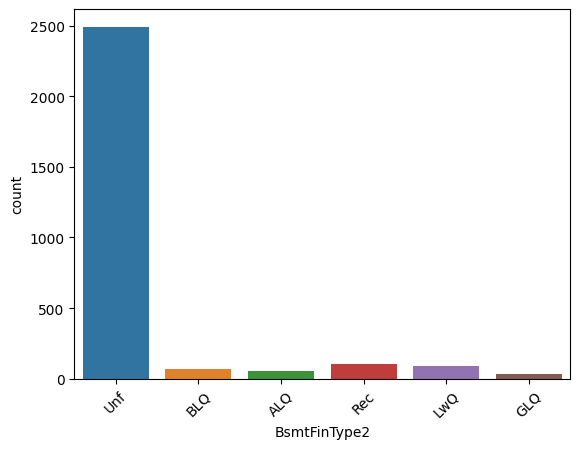

         Heating  Ratio
Heating                
GasA        2874 98.458
GasW          27  0.925
Grav           9  0.308
Wall           6  0.206
OthW           2  0.069
Floor          1  0.034
##########################################


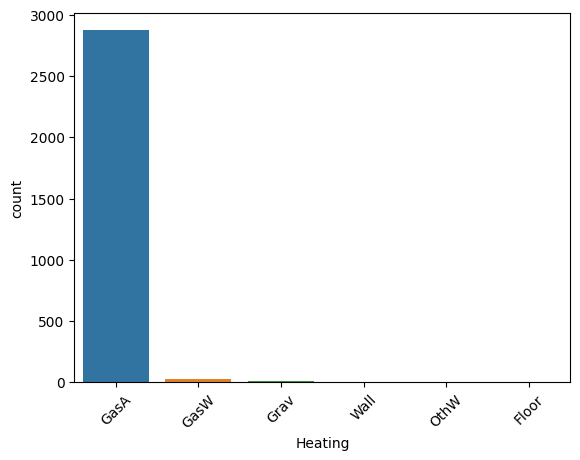

           HeatingQC  Ratio
HeatingQC                  
Ex              1493 51.148
TA               857 29.359
Gd               474 16.238
Fa                92  3.152
Po                 3  0.103
##########################################


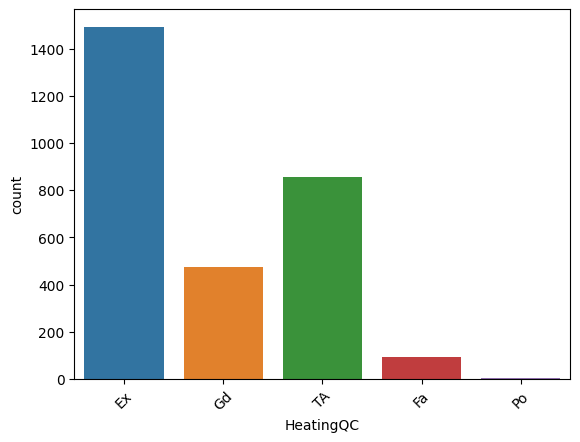

            CentralAir  Ratio
CentralAir                   
Y                 2723 93.285
N                  196  6.715
##########################################


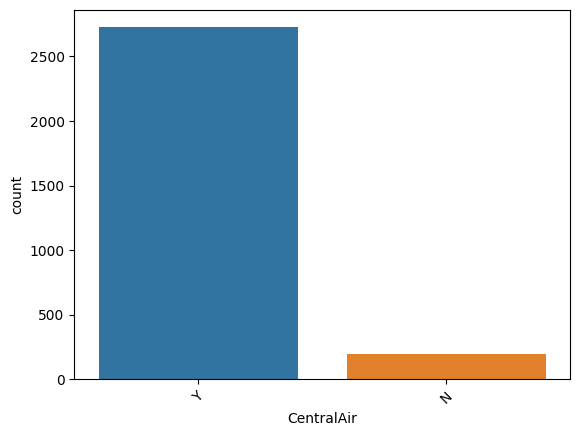

            Electrical  Ratio
Electrical                   
SBrkr             2671 91.504
FuseA              188  6.441
FuseF               50  1.713
FuseP                8  0.274
Mix                  1  0.034
##########################################


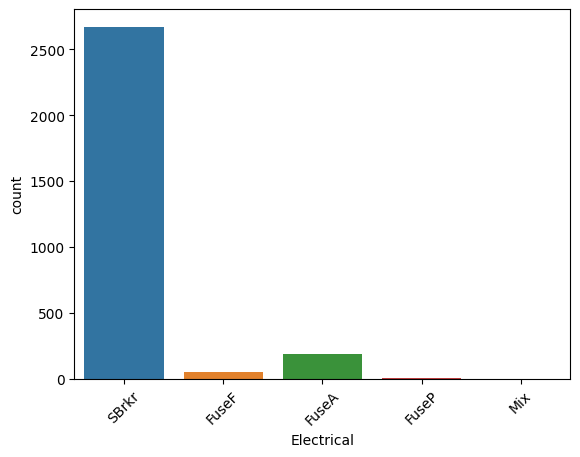

             KitchenQual  Ratio
KitchenQual                    
TA                  1492 51.113
Gd                  1151 39.431
Ex                   205  7.023
Fa                    70  2.398
##########################################


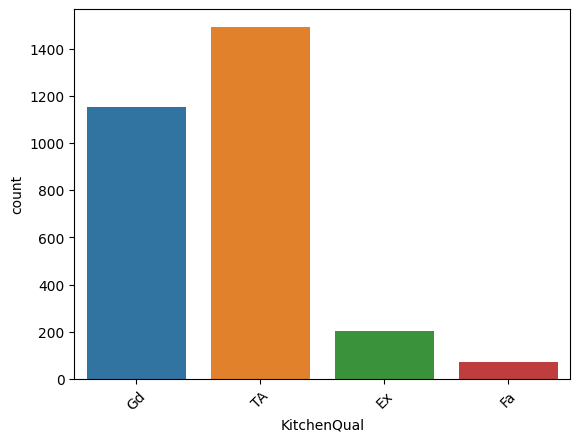

            Functional  Ratio
Functional                   
Typ               2717 93.080
Min2                70  2.398
Min1                65  2.227
Mod                 35  1.199
Maj1                19  0.651
Maj2                 9  0.308
Sev                  2  0.069
##########################################


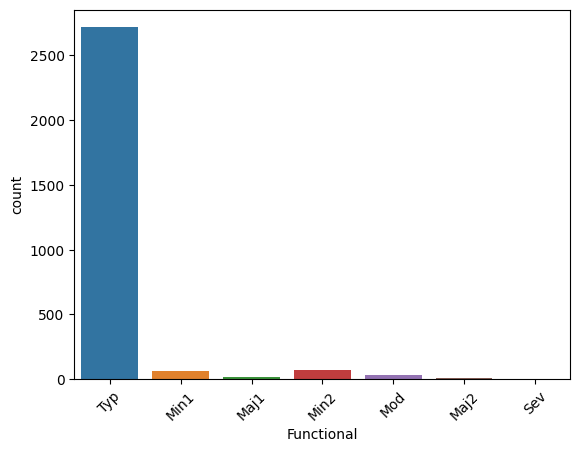

             FireplaceQu  Ratio
FireplaceQu                    
Gd                   744 25.488
TA                   592 20.281
Fa                    74  2.535
Po                    46  1.576
Ex                    43  1.473
##########################################


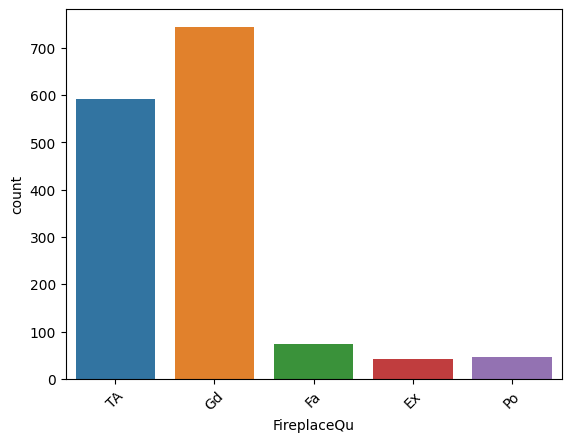

            GarageType  Ratio
GarageType                   
Attchd            1723 59.027
Detchd             779 26.687
BuiltIn            186  6.372
Basment             36  1.233
2Types              23  0.788
CarPort             15  0.514
##########################################


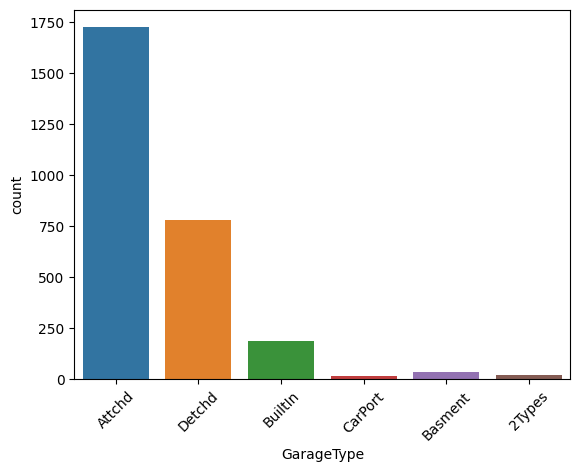

              GarageFinish  Ratio
GarageFinish                     
Unf                   1230 42.138
RFn                    811 27.783
Fin                    719 24.632
##########################################


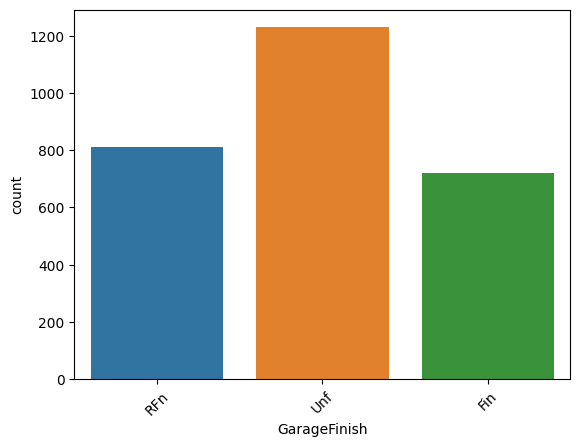

            GarageQual  Ratio
GarageQual                   
TA                2604 89.209
Fa                 124  4.248
Gd                  24  0.822
Po                   5  0.171
Ex                   3  0.103
##########################################


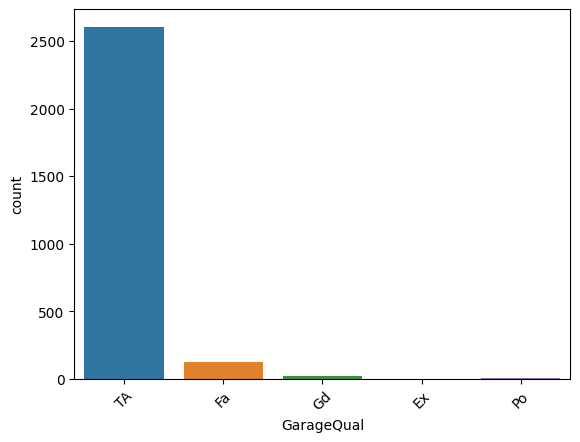

            GarageCond  Ratio
GarageCond                   
TA                2654 90.922
Fa                  74  2.535
Gd                  15  0.514
Po                  14  0.480
Ex                   3  0.103
##########################################


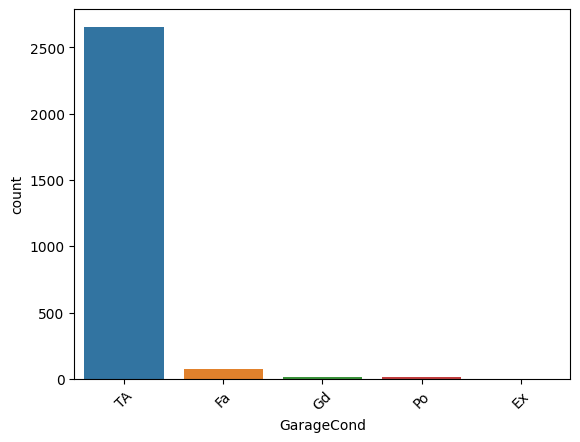

            PavedDrive  Ratio
PavedDrive                   
Y                 2641 90.476
N                  216  7.400
P                   62  2.124
##########################################


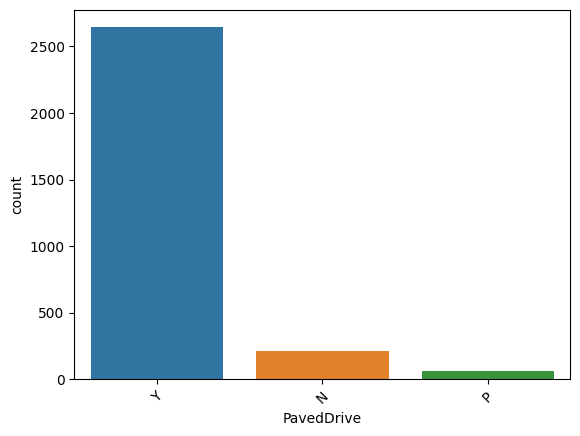

        PoolQC  Ratio
PoolQC               
Ex           4  0.137
Gd           4  0.137
Fa           2  0.069
##########################################


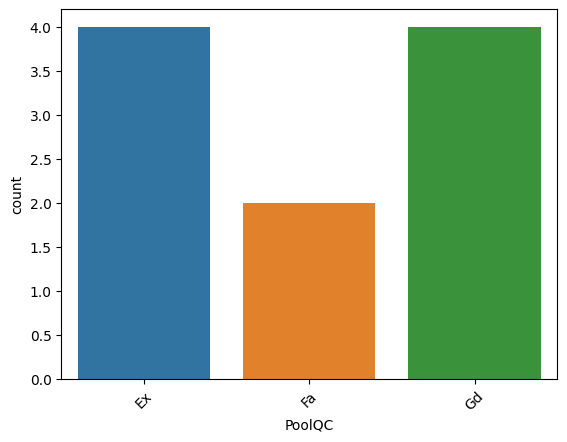

       Fence  Ratio
Fence              
MnPrv    329 11.271
GdPrv    118  4.042
GdWo     112  3.837
MnWw      12  0.411
##########################################


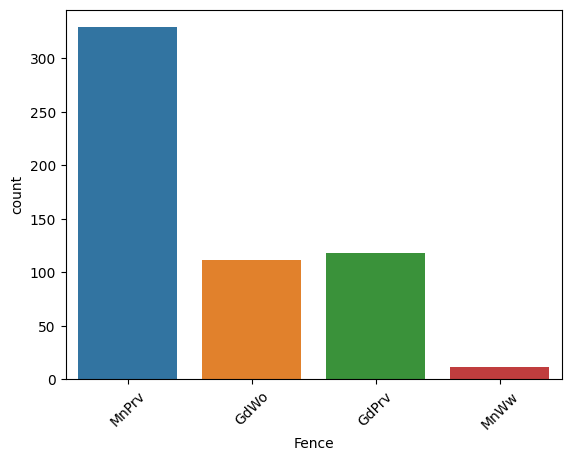

             MiscFeature  Ratio
MiscFeature                    
Shed                  95  3.255
Gar2                   5  0.171
Othr                   4  0.137
TenC                   1  0.034
##########################################


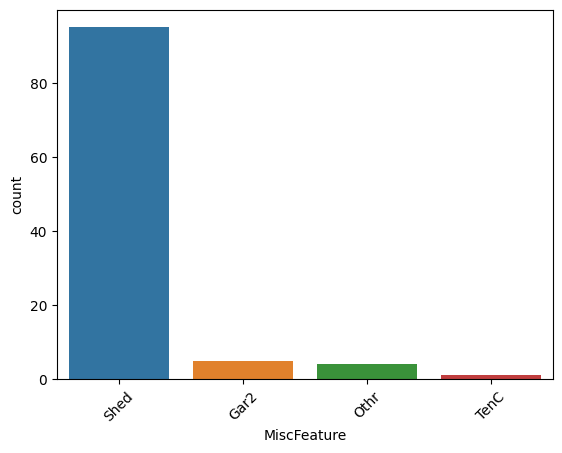

          SaleType  Ratio
SaleType                 
WD            2525 86.502
New            239  8.188
COD             87  2.980
ConLD           26  0.891
CWD             12  0.411
ConLI            9  0.308
ConLw            8  0.274
Oth              7  0.240
Con              5  0.171
##########################################


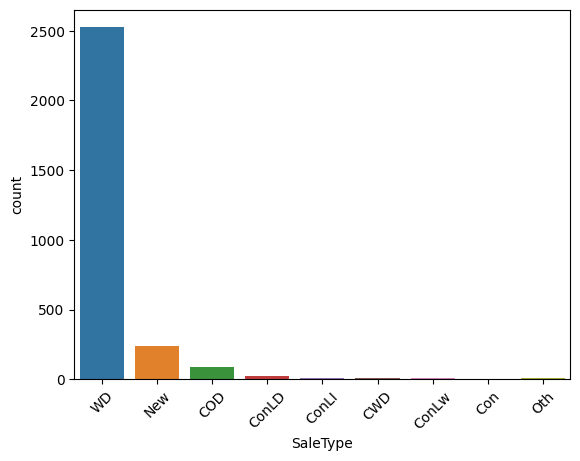

               SaleCondition  Ratio
SaleCondition                      
Normal                  2402 82.288
Partial                  245  8.393
Abnorml                  190  6.509
Family                    46  1.576
Alloca                    24  0.822
AdjLand                   12  0.411
##########################################


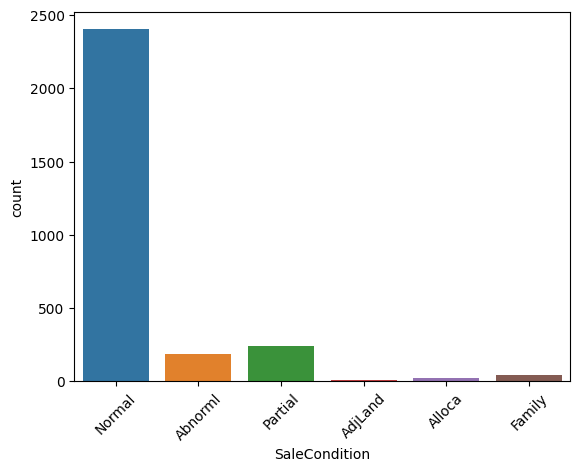

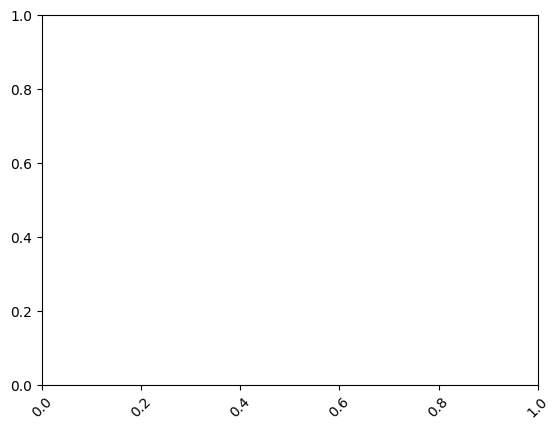

In [15]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## 数値変数の分析

In [16]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles)) # describeの時は、quantilesの12分割

    if plot:
        dataframe[numerical_col].hist(bins=20) # グラフのときは、20分割
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   2919.000
mean    1460.000
std      842.787
min        1.000
5%       146.900
10%      292.800
20%      584.600
30%      876.400
40%     1168.200
50%     1460.000
60%     1751.800
70%     2043.600
80%     2335.400
90%     2627.200
95%     2773.100
99%     2889.820
max     2919.000
Name: Id, dtype: float64


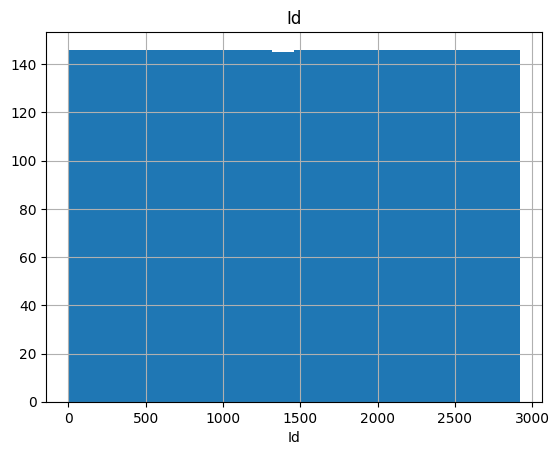

count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


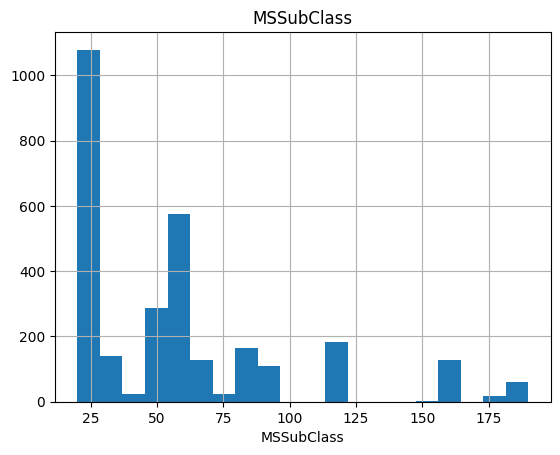

count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64


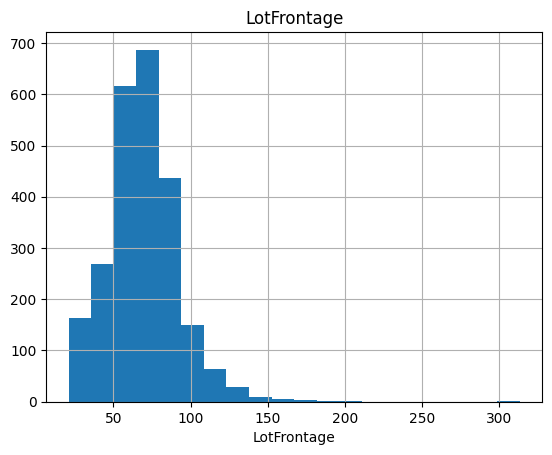

count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float64


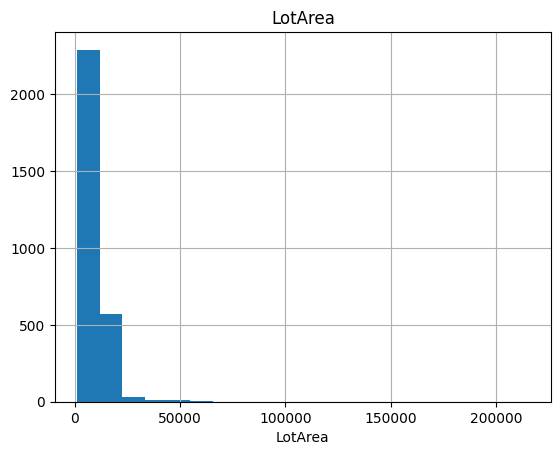

count   2919.000
mean       6.089
std        1.410
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


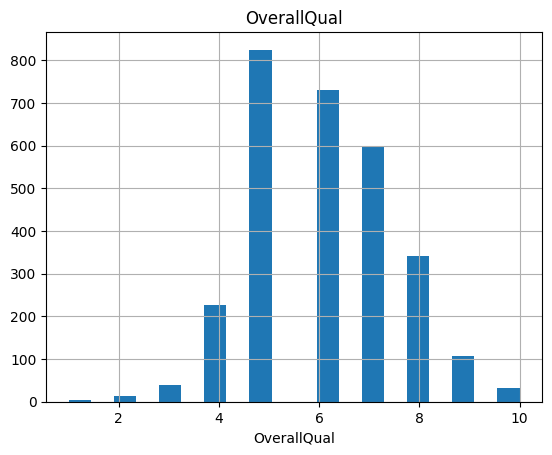

count   2919.000
mean       5.565
std        1.113
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        5.000
50%        5.000
60%        5.000
70%        6.000
80%        6.000
90%        7.000
95%        8.000
99%        9.000
max        9.000
Name: OverallCond, dtype: float64


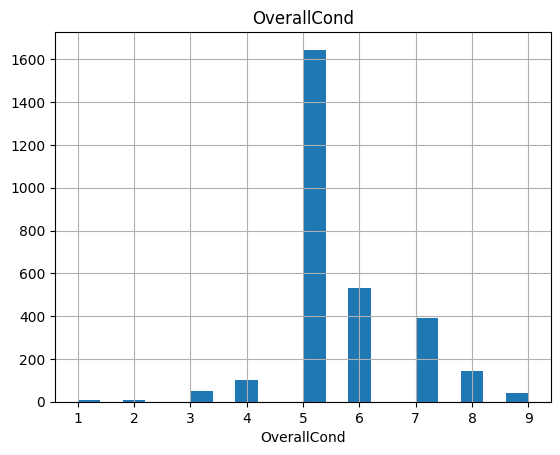

count   2919.000
mean    1971.313
std       30.291
min     1872.000
5%      1915.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2008.000
max     2010.000
Name: YearBuilt, dtype: float64


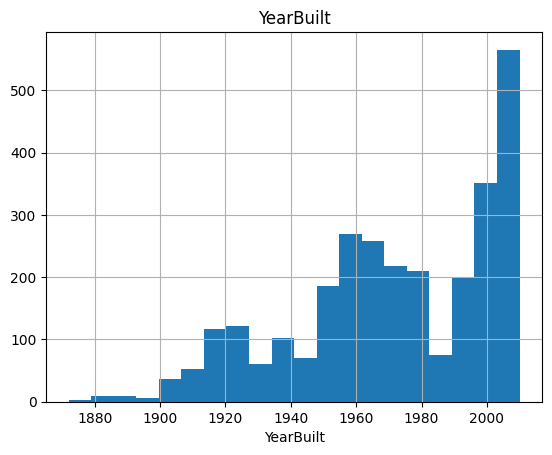

count   2919.000
mean    1984.264
std       20.894
min     1950.000
5%      1950.000
10%     1950.000
20%     1960.000
30%     1970.000
40%     1978.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


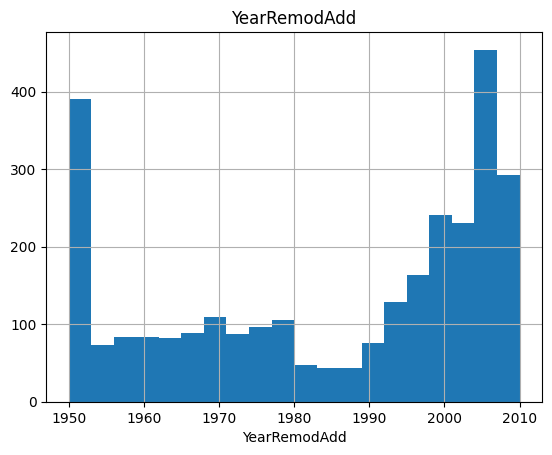

count   2896.000
mean     102.201
std      179.334
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      120.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
max     1600.000
Name: MasVnrArea, dtype: float64


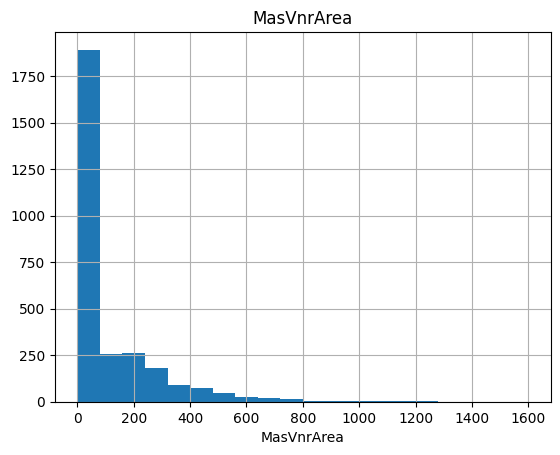

count   2918.000
mean     441.423
std      455.611
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      202.600
50%      368.500
60%      515.200
70%      656.000
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
max     5644.000
Name: BsmtFinSF1, dtype: float64


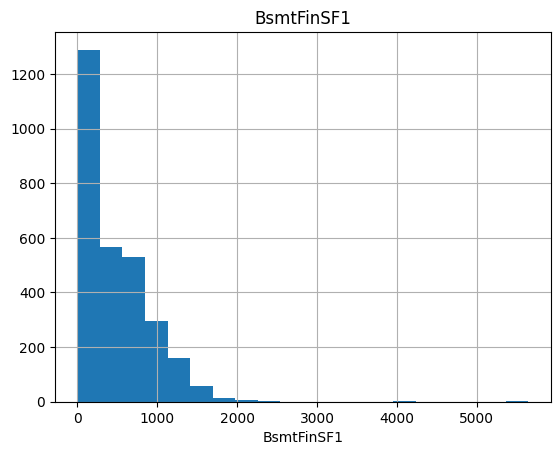

count   2918.000
mean      49.582
std      169.206
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
max     1526.000
Name: BsmtFinSF2, dtype: float64


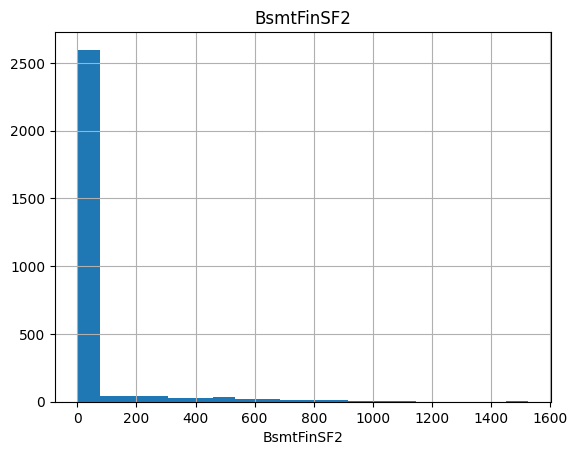

count   2918.000
mean     560.772
std      439.544
min        0.000
5%         0.000
10%       56.000
20%      174.000
30%      270.000
40%      365.800
50%      467.000
60%      595.000
70%      732.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
max     2336.000
Name: BsmtUnfSF, dtype: float64


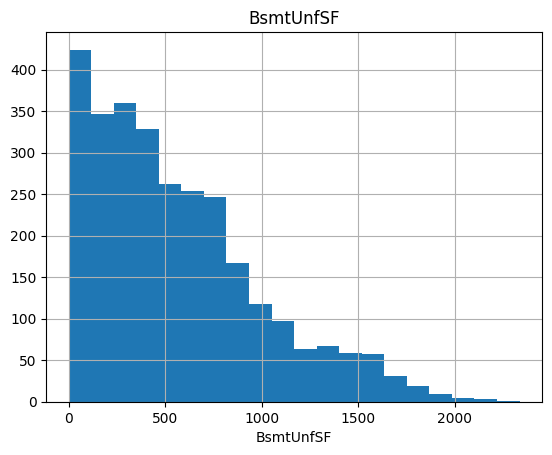

count   2918.000
mean    1051.778
std      440.766
min        0.000
5%       455.250
10%      600.000
20%      741.000
30%      836.000
40%      911.000
50%      989.500
60%     1089.200
70%     1216.000
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
max     6110.000
Name: TotalBsmtSF, dtype: float64


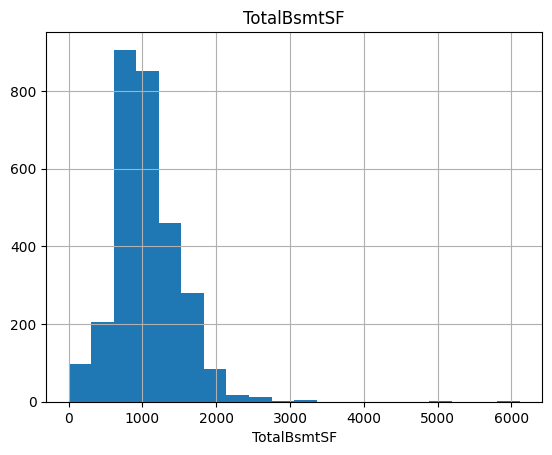

count   2919.000
mean    1159.582
std      392.362
min      334.000
5%       665.900
10%      744.800
20%      847.000
30%      914.000
40%      996.200
50%     1082.000
60%     1180.000
70%     1314.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
max     5095.000
Name: 1stFlrSF, dtype: float64


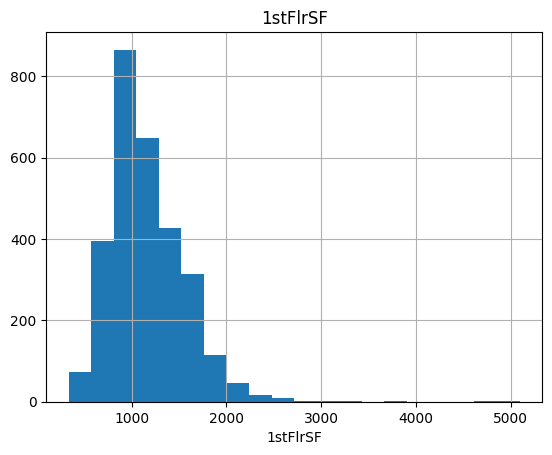

count   2919.000
mean     336.484
std      428.701
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      427.400
70%      636.000
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
max     2065.000
Name: 2ndFlrSF, dtype: float64


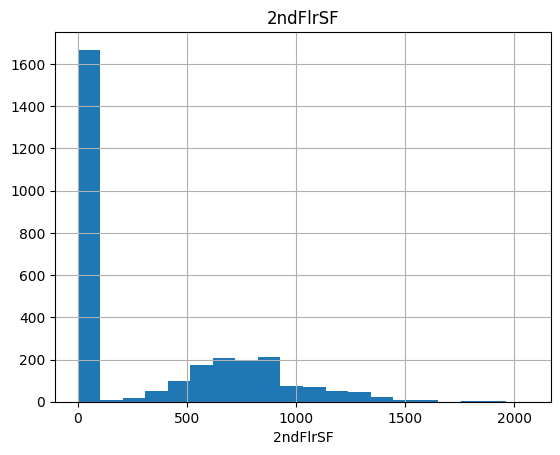

count   2919.000
mean       4.694
std       46.397
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
max     1064.000
Name: LowQualFinSF, dtype: float64


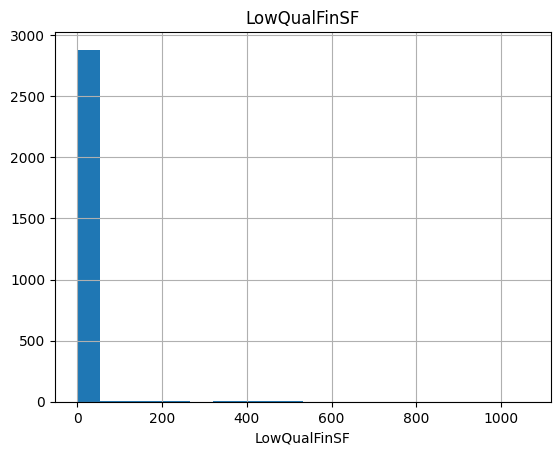

count   2919.000
mean    1500.760
std      506.051
min      334.000
5%       861.000
10%      923.800
20%     1064.600
30%     1200.000
40%     1329.200
50%     1444.000
60%     1560.000
70%     1680.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
max     5642.000
Name: GrLivArea, dtype: float64


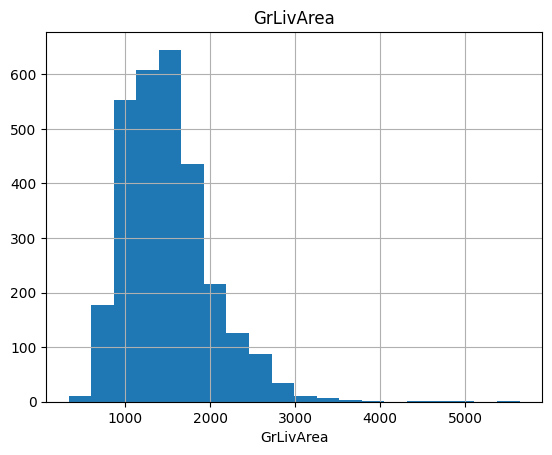

count   2917.000
mean       0.430
std        0.525
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        1.000
70%        1.000
80%        1.000
90%        1.000
95%        1.000
99%        2.000
max        3.000
Name: BsmtFullBath, dtype: float64


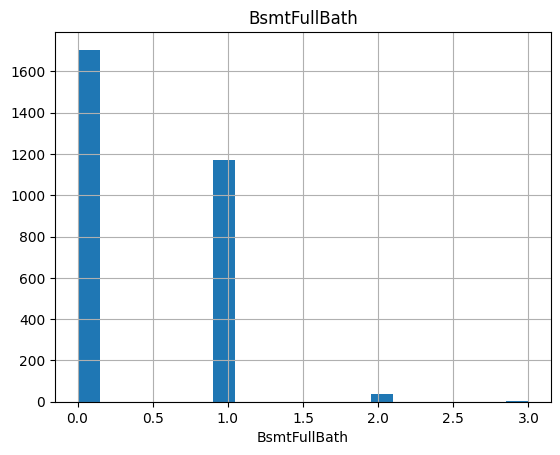

count   2917.000
mean       0.061
std        0.246
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        1.000
99%        1.000
max        2.000
Name: BsmtHalfBath, dtype: float64


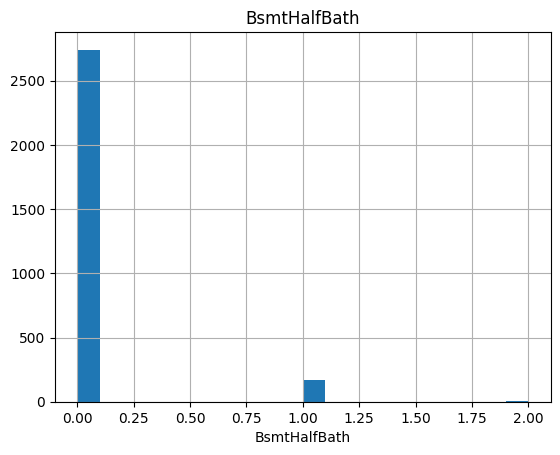

count   2919.000
mean       1.568
std        0.553
min        0.000
5%         1.000
10%        1.000
20%        1.000
30%        1.000
40%        1.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        2.000
95%        2.000
99%        3.000
max        4.000
Name: FullBath, dtype: float64


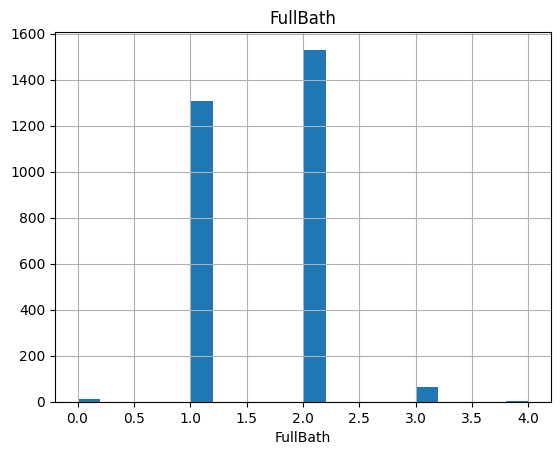

count   2919.000
mean       0.380
std        0.503
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        1.000
80%        1.000
90%        1.000
95%        1.000
99%        1.000
max        2.000
Name: HalfBath, dtype: float64


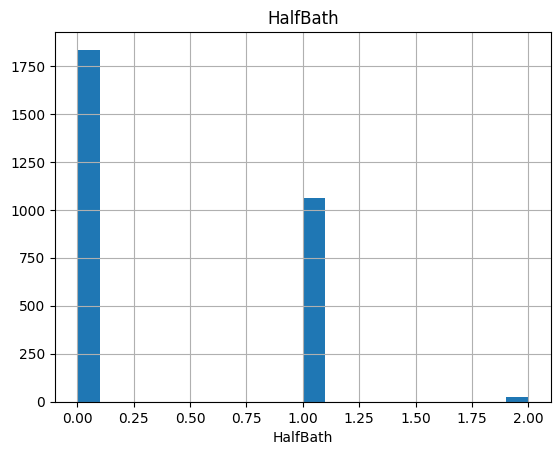

count   2919.000
mean       2.860
std        0.823
min        0.000
5%         2.000
10%        2.000
20%        2.000
30%        3.000
40%        3.000
50%        3.000
60%        3.000
70%        3.000
80%        3.000
90%        4.000
95%        4.000
99%        5.000
max        8.000
Name: BedroomAbvGr, dtype: float64


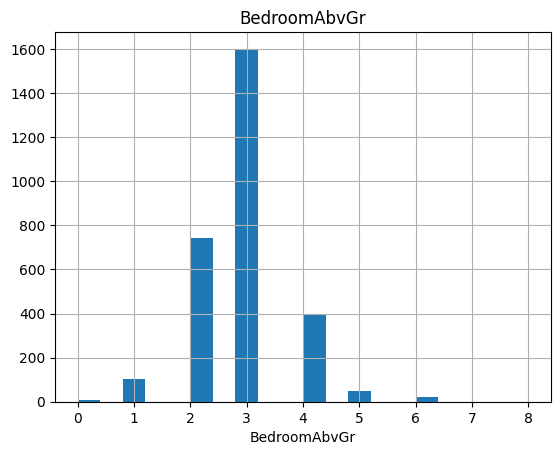

count   2919.000
mean       1.045
std        0.214
min        0.000
5%         1.000
10%        1.000
20%        1.000
30%        1.000
40%        1.000
50%        1.000
60%        1.000
70%        1.000
80%        1.000
90%        1.000
95%        1.000
99%        2.000
max        3.000
Name: KitchenAbvGr, dtype: float64


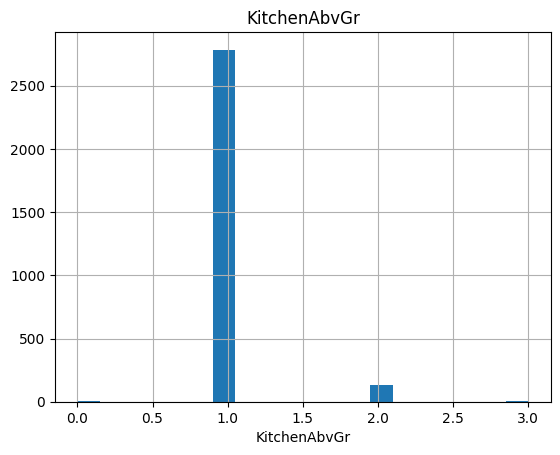

count   2919.000
mean       6.452
std        1.569
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


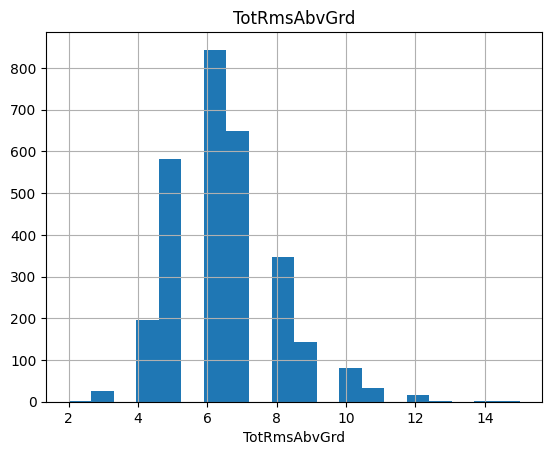

count   2919.000
mean       0.597
std        0.646
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        1.000
60%        1.000
70%        1.000
80%        1.000
90%        1.000
95%        2.000
99%        2.000
max        4.000
Name: Fireplaces, dtype: float64


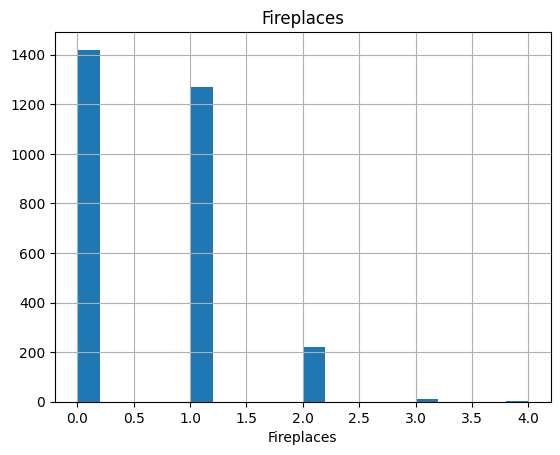

count   2760.000
mean    1978.113
std       25.574
min     1895.000
5%      1928.000
10%     1941.000
20%     1957.000
30%     1964.000
40%     1972.000
50%     1979.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2207.000
Name: GarageYrBlt, dtype: float64


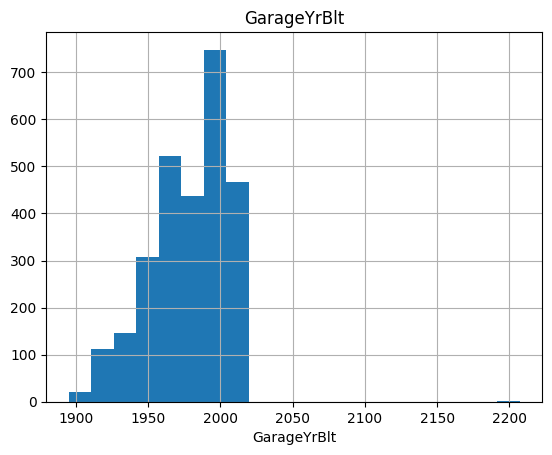

count   2918.000
mean       1.767
std        0.762
min        0.000
5%         0.000
10%        1.000
20%        1.000
30%        1.000
40%        2.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        3.000
95%        3.000
99%        3.000
max        5.000
Name: GarageCars, dtype: float64


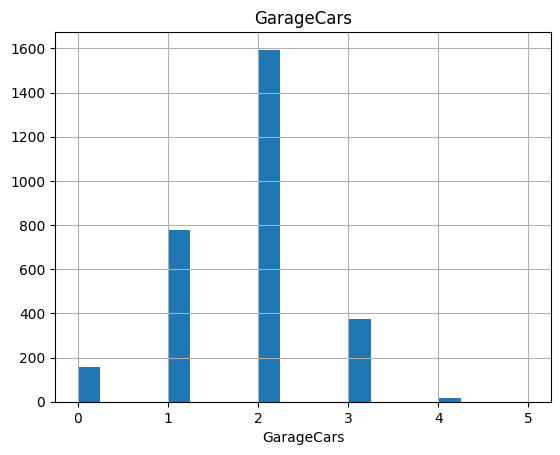

count   2918.000
mean     472.875
std      215.395
min        0.000
5%         0.000
10%      240.000
20%      296.000
30%      379.000
40%      440.000
50%      480.000
60%      513.000
70%      560.900
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
max     1488.000
Name: GarageArea, dtype: float64


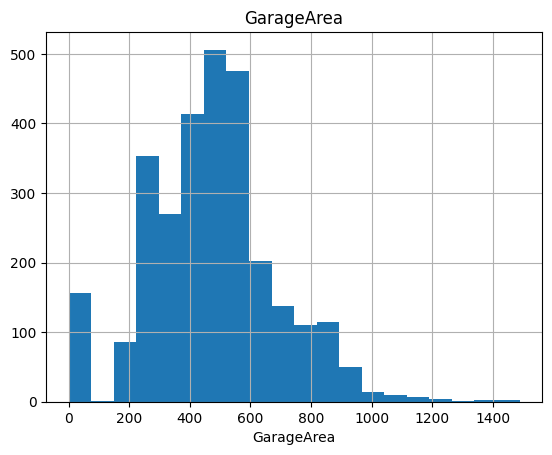

count   2919.000
mean      93.710
std      126.527
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
max     1424.000
Name: WoodDeckSF, dtype: float64


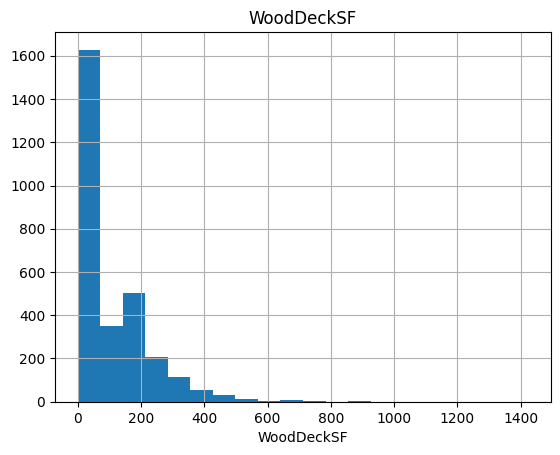

count   2919.000
mean      47.487
std       67.575
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       26.000
60%       40.000
70%       58.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
max      742.000
Name: OpenPorchSF, dtype: float64


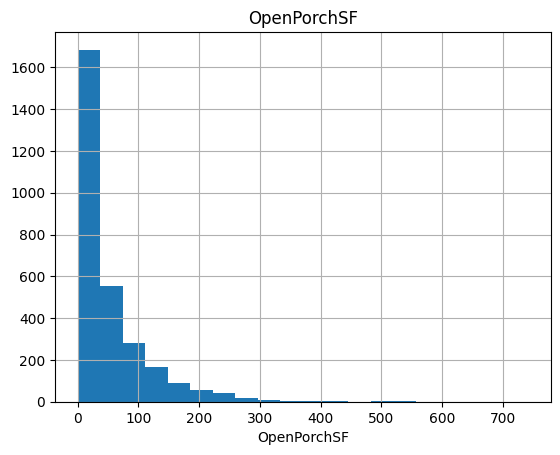

count   2919.000
mean      23.098
std       64.244
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
max     1012.000
Name: EnclosedPorch, dtype: float64


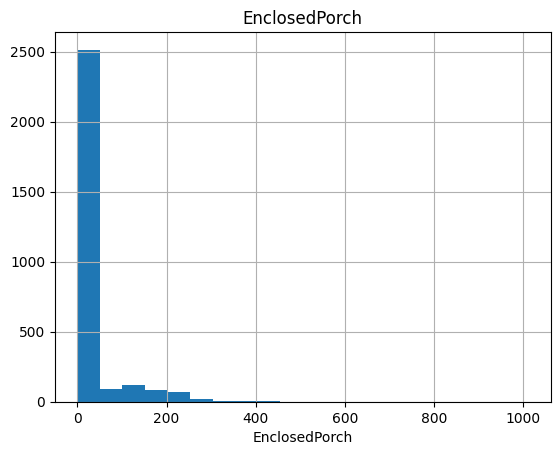

count   2919.000
mean       2.602
std       25.188
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
max      508.000
Name: 3SsnPorch, dtype: float64


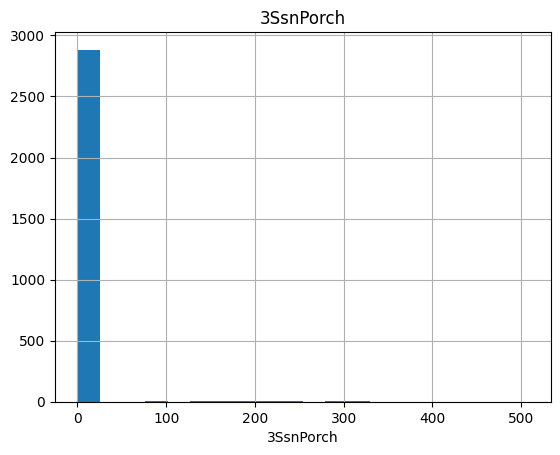

count   2919.000
mean      16.062
std       56.184
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
max      576.000
Name: ScreenPorch, dtype: float64


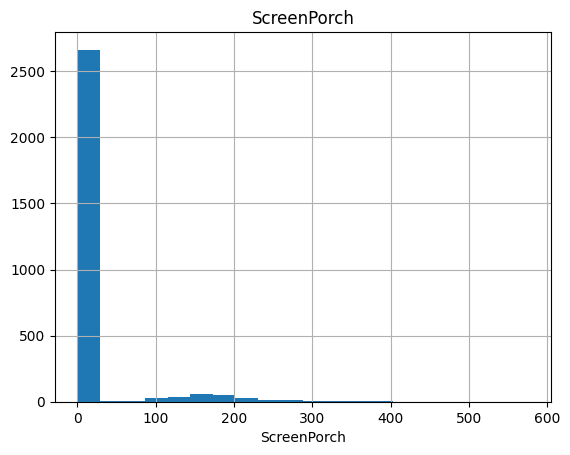

count   2919.000
mean       2.252
std       35.664
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      800.000
Name: PoolArea, dtype: float64


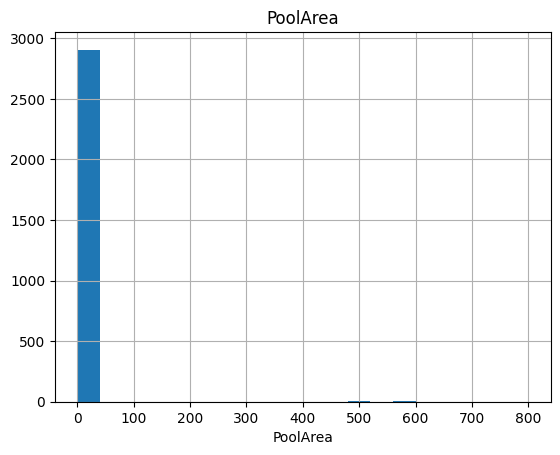

count    2919.000
mean       50.826
std       567.402
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
max     17000.000
Name: MiscVal, dtype: float64


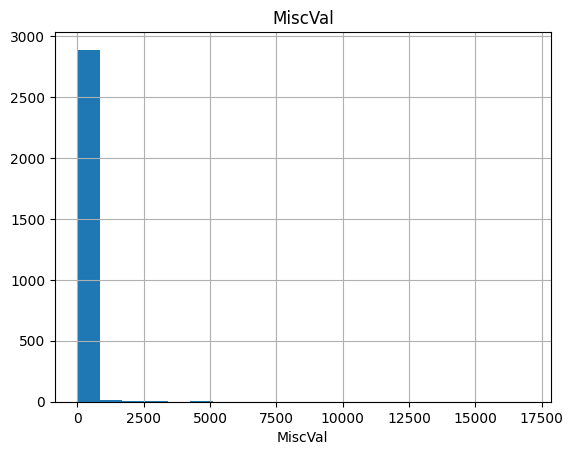

count   2919.000
mean       6.213
std        2.715
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


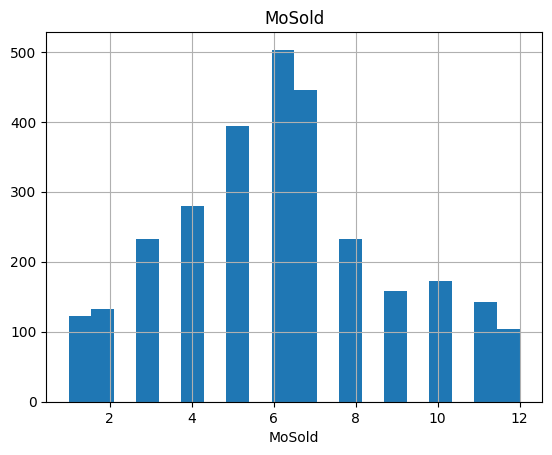

count   2919.000
mean    2007.793
std        1.315
min     2006.000
5%      2006.000
10%     2006.000
20%     2006.000
30%     2007.000
40%     2007.000
50%     2008.000
60%     2008.000
70%     2009.000
80%     2009.000
90%     2010.000
95%     2010.000
99%     2010.000
max     2010.000
Name: YrSold, dtype: float64


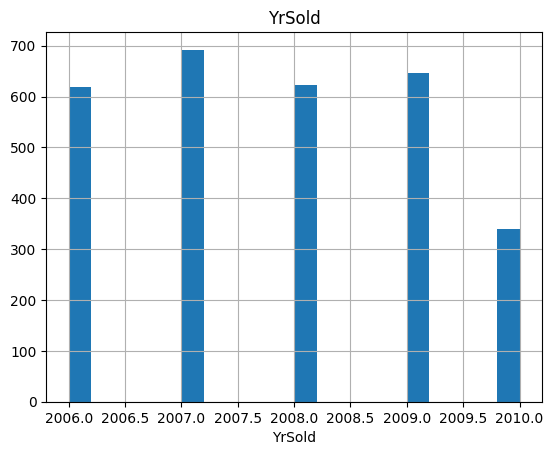

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64


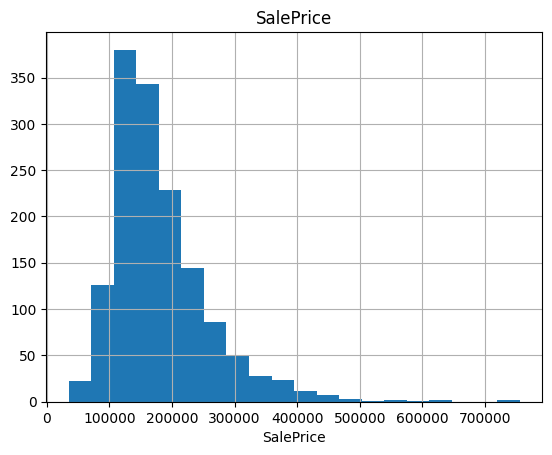

In [17]:
for col in num_cols:
    num_summary(df, col, plot=True)

## 目的変数の分析

In [18]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    # カテゴリ変数における目的変数の平均を出力
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830




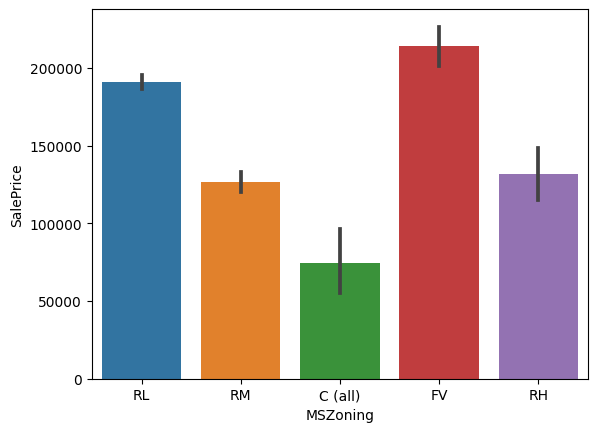

        TARGET_MEAN
Street             
Grvl     130190.500
Pave     181130.539




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


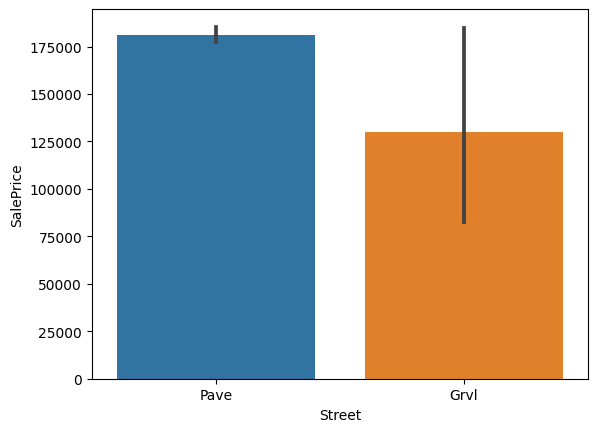

       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585




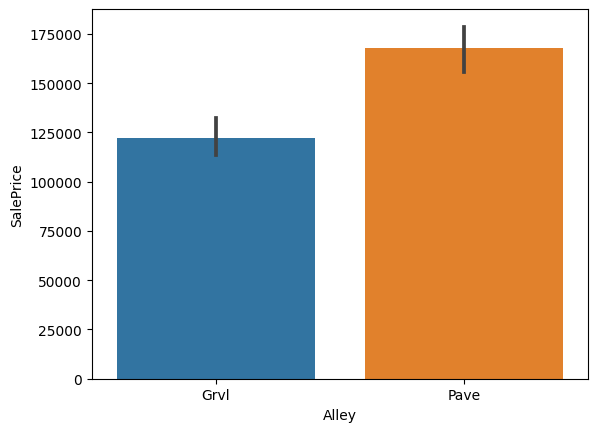

          TARGET_MEAN
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818




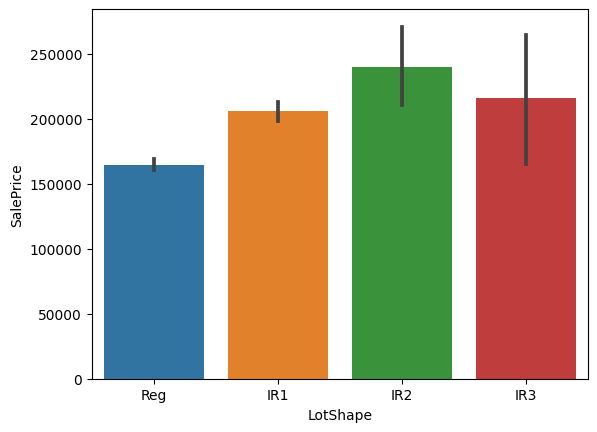

             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747




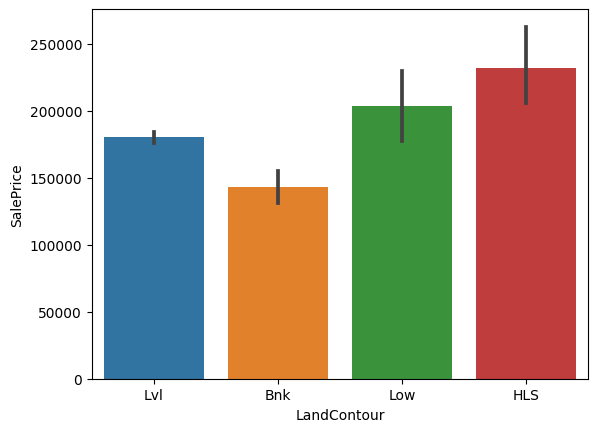

           TARGET_MEAN
Utilities             
AllPub      180950.957
NoSeWa      137500.000




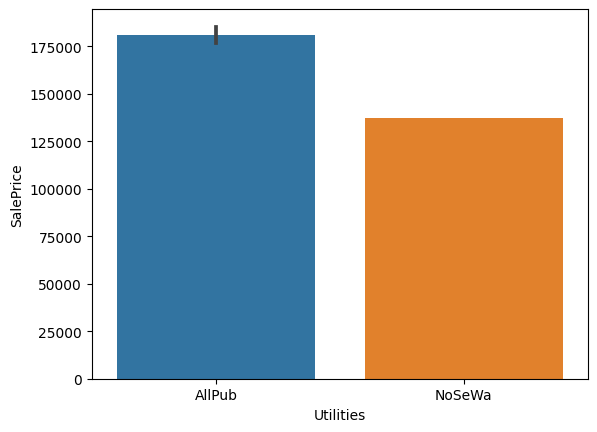

           TARGET_MEAN
LotConfig             
Corner      181623.426
CulDSac     223854.617
FR2         177934.574
FR3         208475.000
Inside      176938.048




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


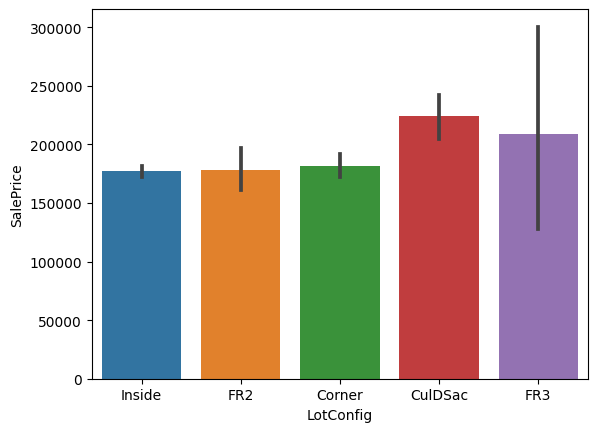

           TARGET_MEAN
LandSlope             
Gtl         179956.800
Mod         196734.138
Sev         204379.231




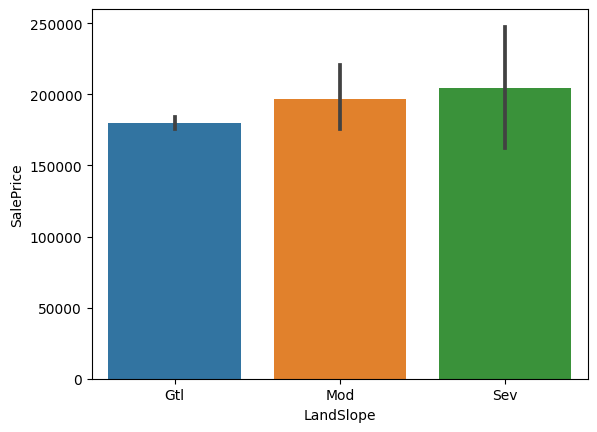

            TARGET_MEAN
Condition1             
Artery       135091.667
Feedr        142475.481
Norm         184495.492
PosA         225875.000
PosN         215184.211
RRAe         138400.000
RRAn         184396.615
RRNe         190750.000
RRNn         212400.000




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


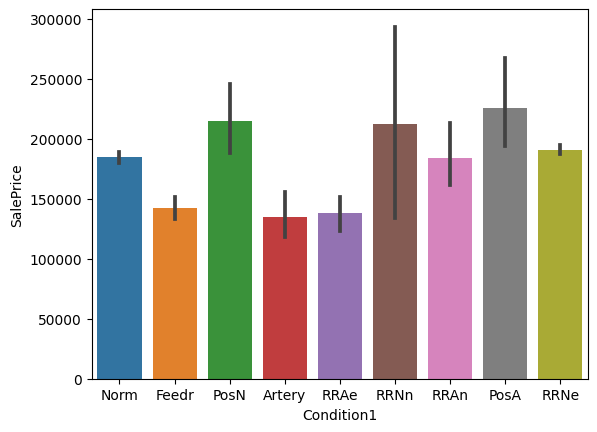

            TARGET_MEAN
Condition2             
Artery       106500.000
Feedr        121166.667
Norm         181169.406
PosA         325000.000
PosN         284875.000
RRAe         190000.000
RRAn         136905.000
RRNn          96750.000




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


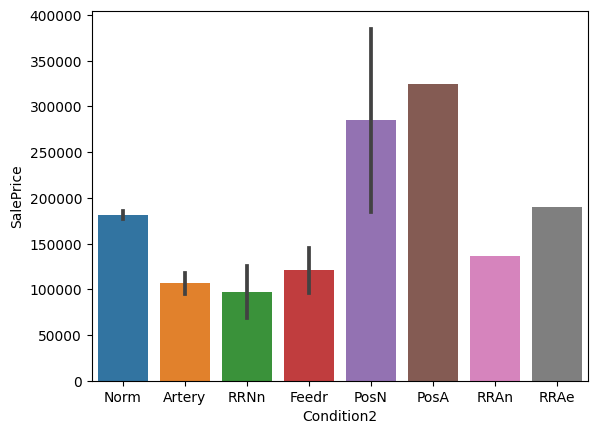

          TARGET_MEAN
BldgType             
1Fam       185763.807
2fmCon     128432.258
Duplex     133541.077
Twnhs      135911.628
TwnhsE     181959.342




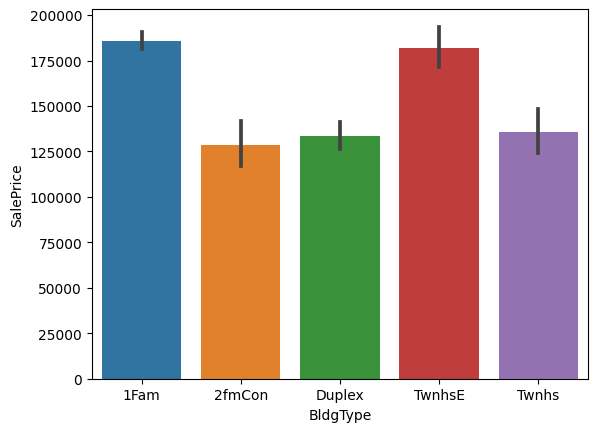

            TARGET_MEAN
HouseStyle             
1.5Fin       143116.740
1.5Unf       110150.000
1Story       175985.478
2.5Fin       220000.000
2.5Unf       157354.545
2Story       210051.764
SFoyer       135074.486
SLvl         166703.385




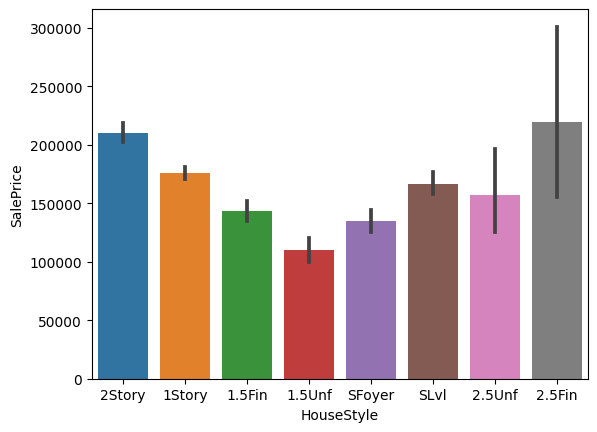

           TARGET_MEAN
RoofStyle             
Flat        194690.000
Gable       171483.956
Gambrel     148909.091
Hip         218876.934
Mansard     180568.429
Shed        225000.000




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


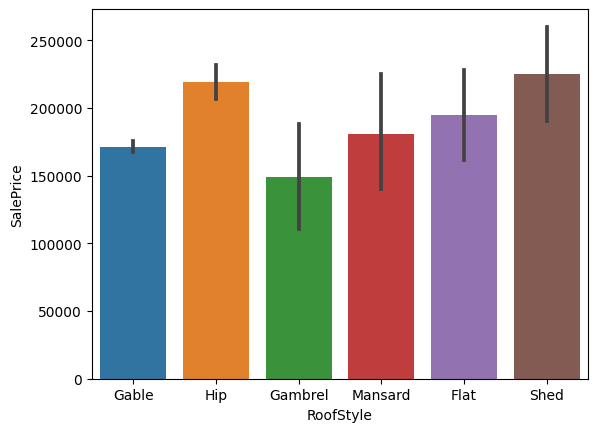

          TARGET_MEAN
RoofMatl             
ClyTile    160000.000
CompShg    179803.679
Membran    241500.000
Metal      180000.000
Roll       137000.000
Tar&Grv    185406.364
WdShake    241400.000
WdShngl    390250.000




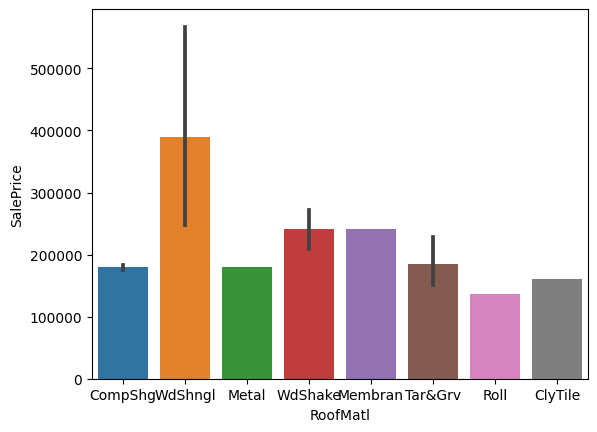

             TARGET_MEAN
Exterior1st             
AsbShng       107385.550
AsphShn       100000.000
BrkComm        71000.000
BrkFace       194573.000
CBlock        105000.000
CemntBd       231690.656
HdBoard       163077.450
ImStucc       262000.000
MetalSd       149422.177
Plywood       175942.380
Stone         258500.000
Stucco        162990.000
VinylSd       213732.901
Wd Sdng       149841.646
WdShing       150655.077




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


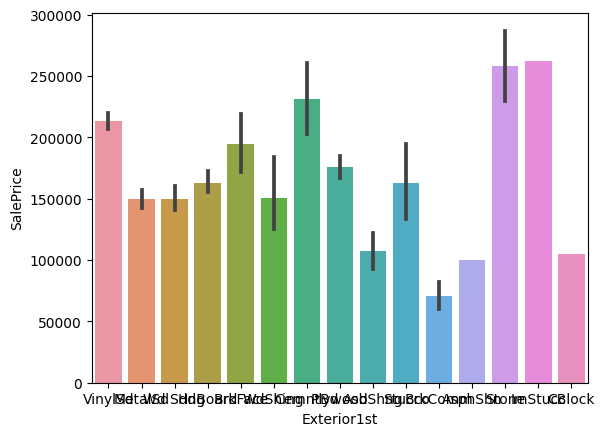

             TARGET_MEAN
Exterior2nd             
AsbShng       114060.550
AsphShn       138000.000
Brk Cmn       126714.286
BrkFace       195818.000
CBlock        105000.000
CmentBd       230093.833
HdBoard       167661.565
ImStucc       252070.000
MetalSd       149803.173
Other         319000.000
Plywood       168112.387
Stone         158224.800
Stucco        155905.154
VinylSd       214432.460
Wd Sdng       148386.066
Wd Shng       161328.947




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


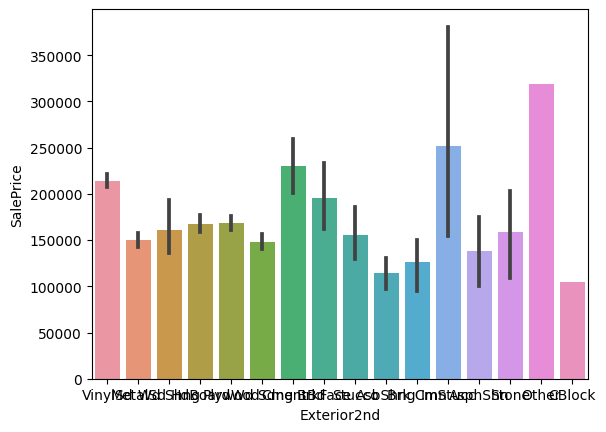

            TARGET_MEAN
MasVnrType             
BrkCmn       146318.067
BrkFace      204691.872
Stone        265583.625




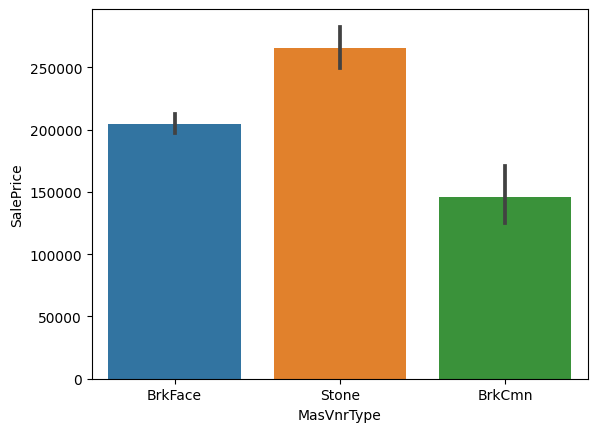

           TARGET_MEAN
ExterQual             
Ex          367360.962
Fa           87985.214
Gd          231633.510
TA          144341.313




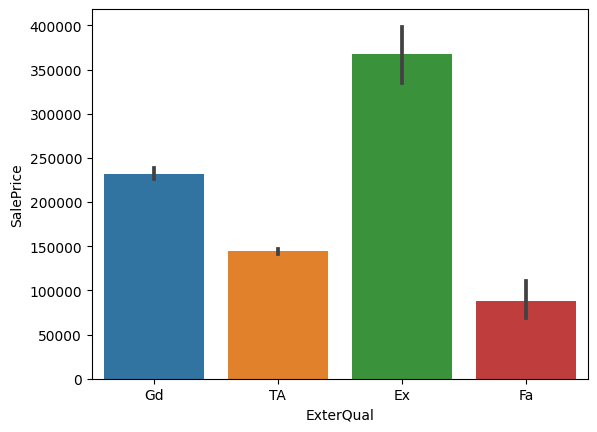

           TARGET_MEAN
ExterCond             
Ex          201333.333
Fa          102595.143
Gd          168897.568
Po           76500.000
TA          184034.896




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


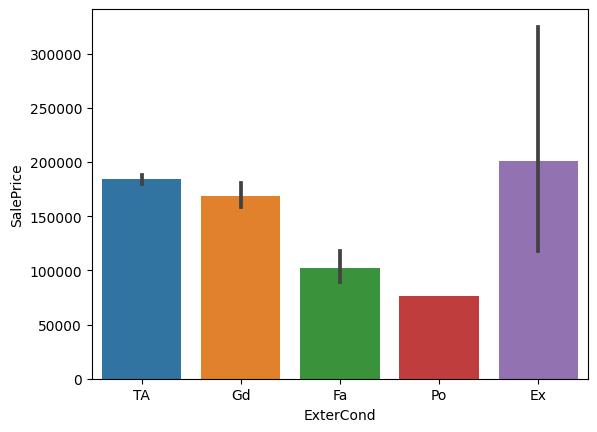

            TARGET_MEAN
Foundation             
BrkTil       132291.075
CBlock       149805.715
PConc        225230.442
Slab         107365.625
Stone        165959.167
Wood         185666.667




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


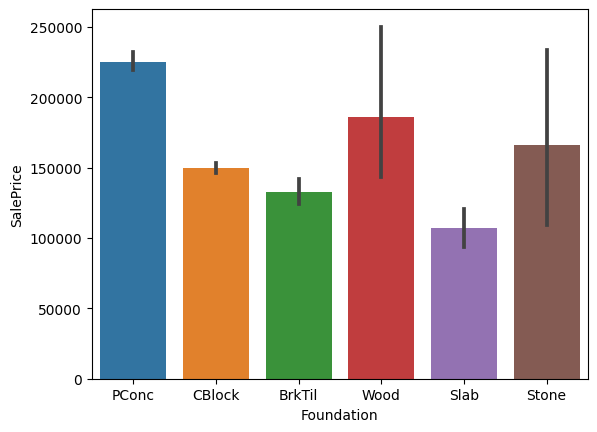

          TARGET_MEAN
BsmtQual             
Ex         327041.041
Fa         115692.029
Gd         202688.479
TA         140759.818




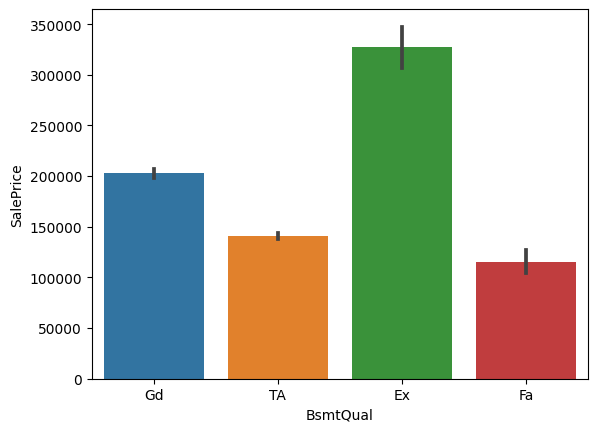

          TARGET_MEAN
BsmtCond             
Fa         121809.533
Gd         213599.908
Po          64000.000
TA         183632.621




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


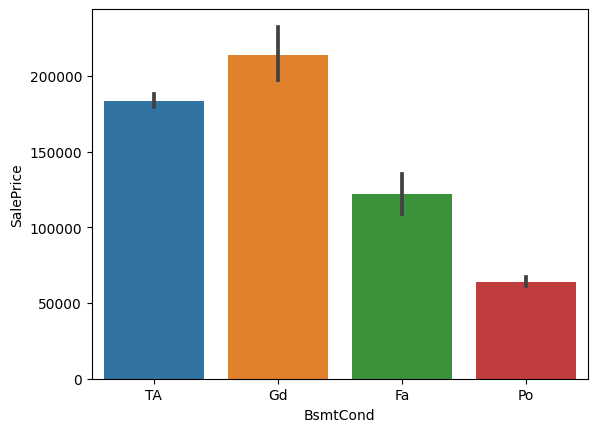

              TARGET_MEAN
BsmtExposure             
Av             206643.421
Gd             257689.806
Mn             192789.658
No             165652.296




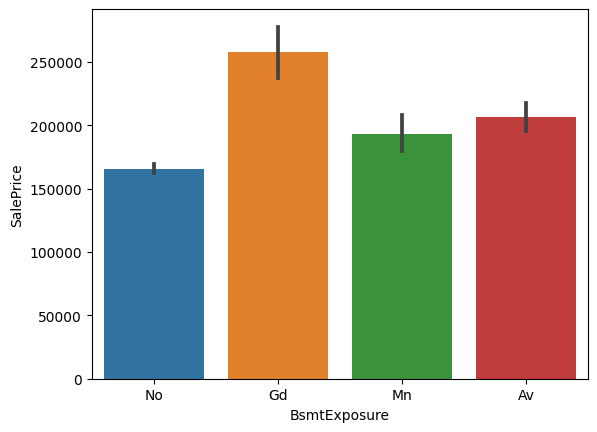

              TARGET_MEAN
BsmtFinType1             
ALQ            161573.068
BLQ            149493.655
GLQ            235413.720
LwQ            151852.703
Rec            146889.248
Unf            170670.577




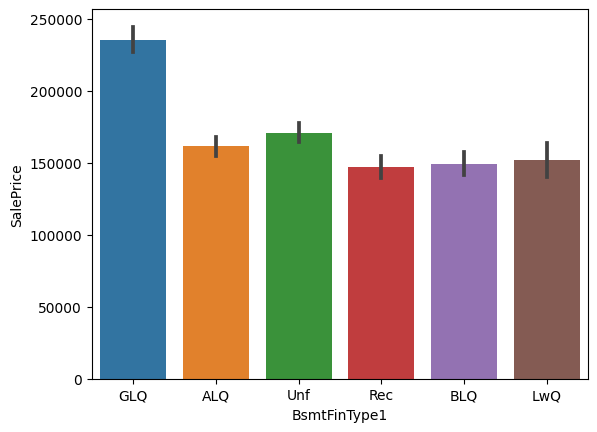

              TARGET_MEAN
BsmtFinType2             
ALQ            209942.105
BLQ            151101.000
GLQ            180982.143
LwQ            164364.130
Rec            164917.130
Unf            184694.690




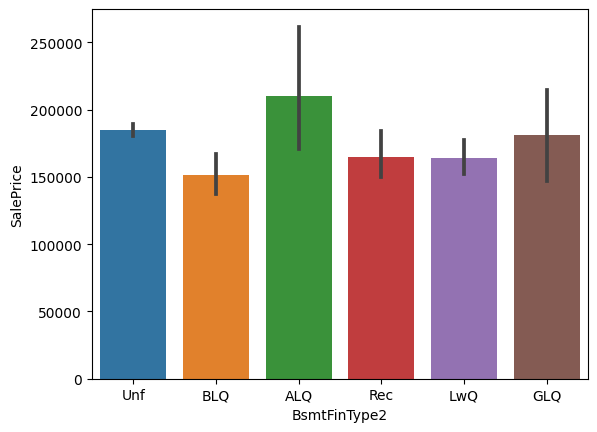

         TARGET_MEAN
Heating             
Floor      72500.000
GasA      182021.195
GasW      166632.167
Grav       75271.429
OthW      125750.000
Wall       92100.000




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


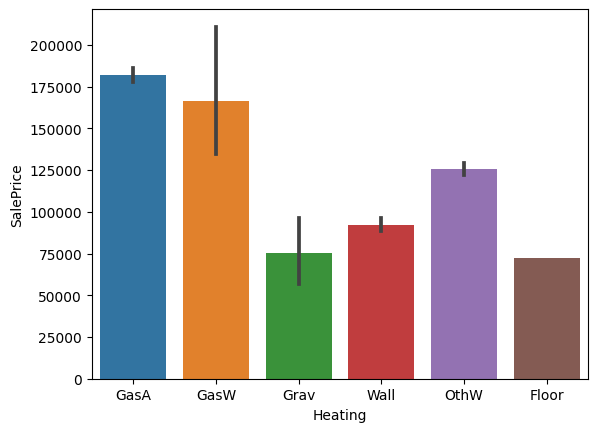

           TARGET_MEAN
HeatingQC             
Ex          214914.429
Fa          123919.490
Gd          156858.871
Po           87000.000
TA          142362.876




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


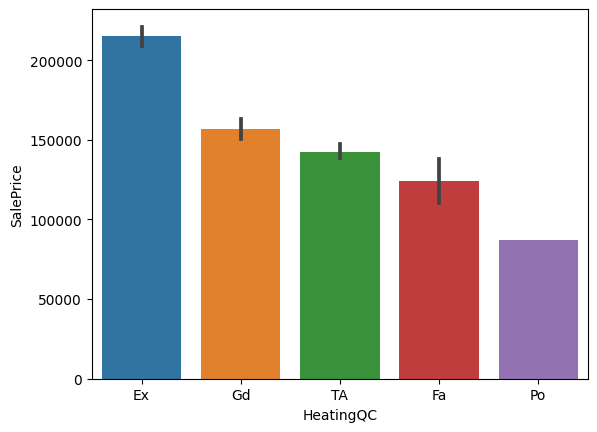

            TARGET_MEAN
CentralAir             
N            105264.074
Y            186186.710




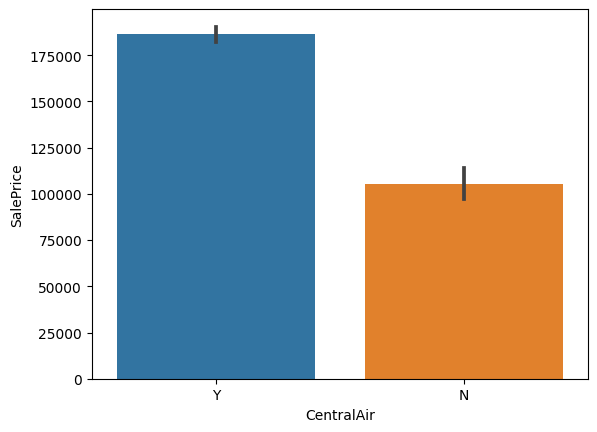

            TARGET_MEAN
Electrical             
FuseA        122196.894
FuseF        107675.444
FuseP         97333.333
Mix           67000.000
SBrkr        186825.113




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


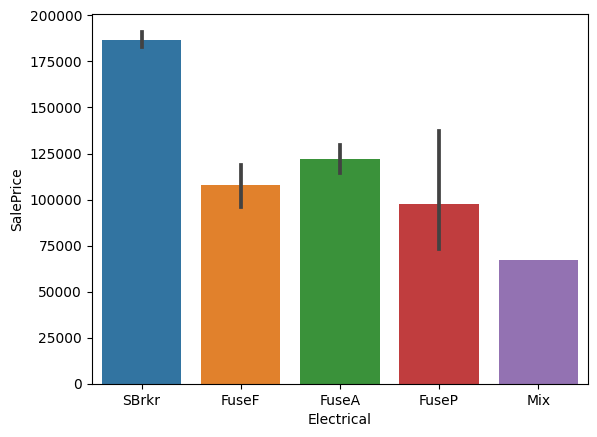

             TARGET_MEAN
KitchenQual             
Ex            328554.670
Fa            105565.205
Gd            212116.024
TA            139962.512




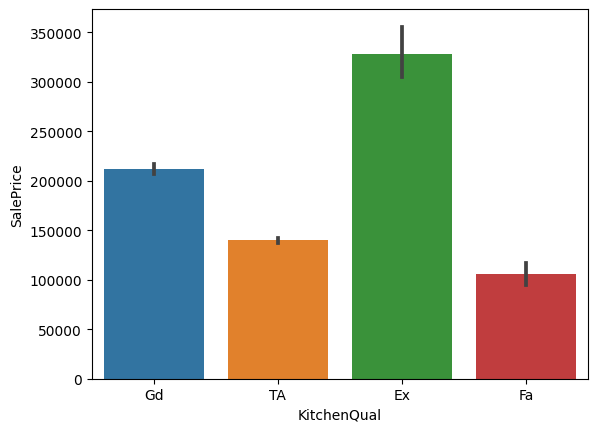

            TARGET_MEAN
Functional             
Maj1         153948.143
Maj2          85800.000
Min1         146385.484
Min2         144240.647
Mod          168393.333
Sev          129000.000
Typ          183429.147




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


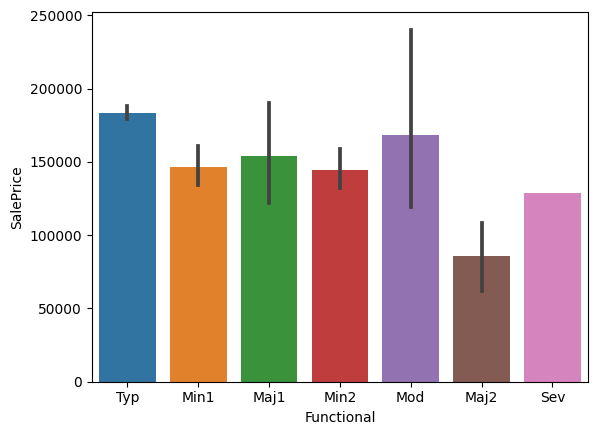

             TARGET_MEAN
FireplaceQu             
Ex            337712.500
Fa            167298.485
Gd            226351.416
Po            129764.150
TA            205723.489




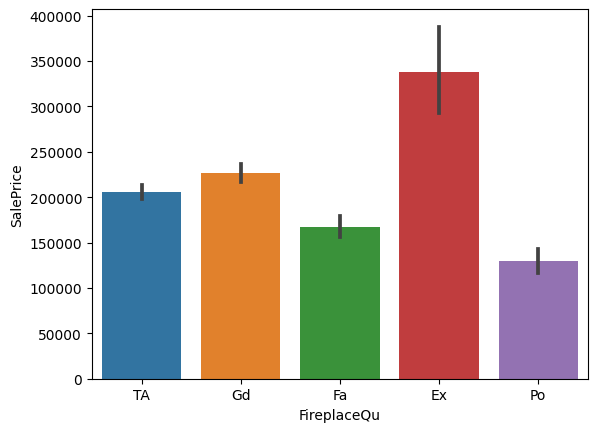

            TARGET_MEAN
GarageType             
2Types       151283.333
Attchd       202892.656
Basment      160570.684
BuiltIn      254751.739
CarPort      109962.111
Detchd       134091.163




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


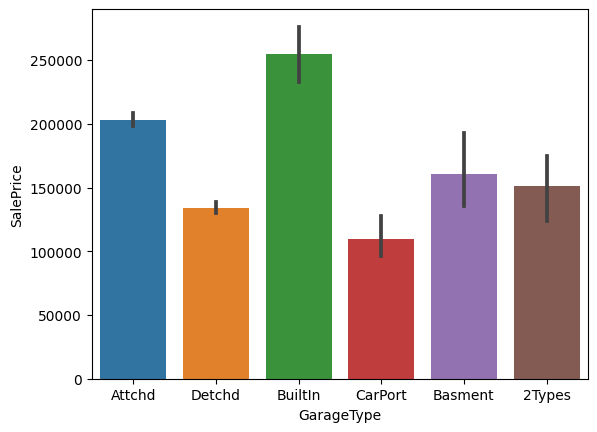

              TARGET_MEAN
GarageFinish             
Fin            240052.690
RFn            202068.870
Unf            142156.423




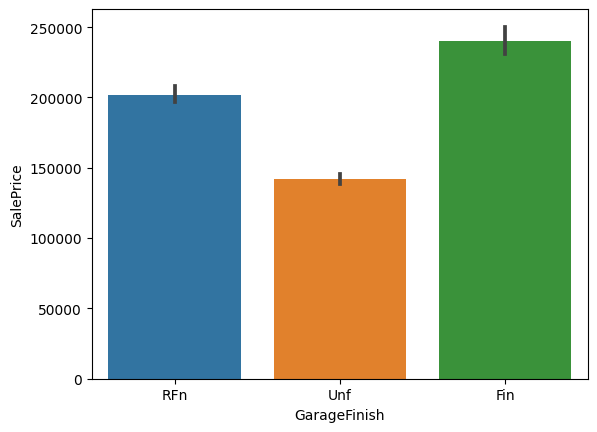

            TARGET_MEAN
GarageQual             
Ex           241000.000
Fa           123573.354
Gd           215860.714
Po           100166.667
TA           187489.836




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


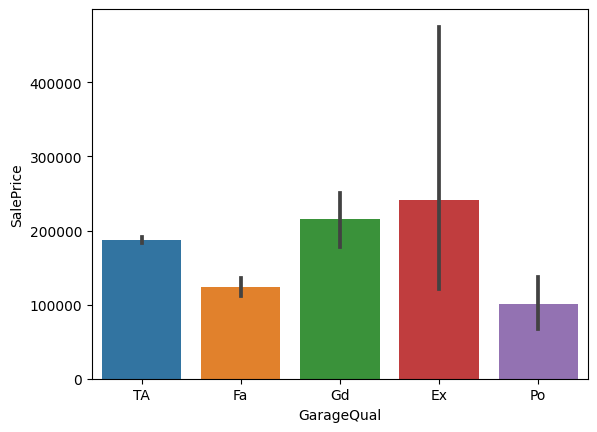

            TARGET_MEAN
GarageCond             
Ex           124000.000
Fa           114654.029
Gd           179930.000
Po           108500.000
TA           187885.735




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


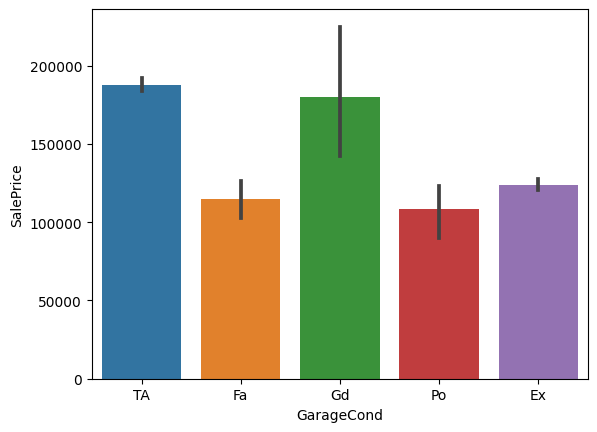

            TARGET_MEAN
PavedDrive             
N            115039.122
P            132330.000
Y            186433.974




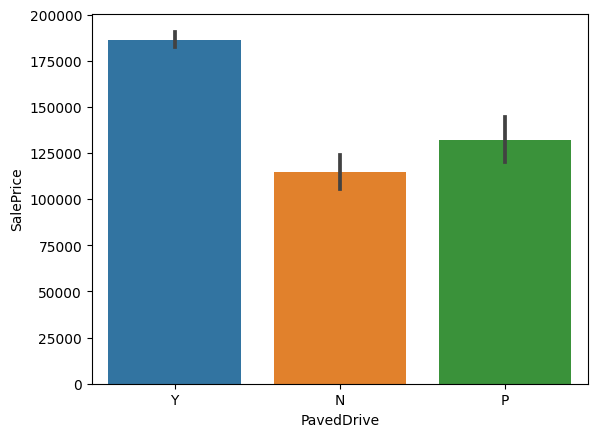

        TARGET_MEAN
PoolQC             
Ex       490000.000
Fa       215500.000
Gd       201990.000




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


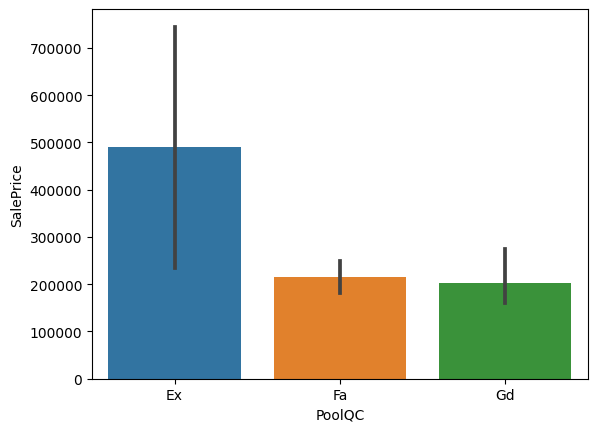

       TARGET_MEAN
Fence             
GdPrv   178927.458
GdWo    140379.315
MnPrv   148751.089
MnWw    134286.364




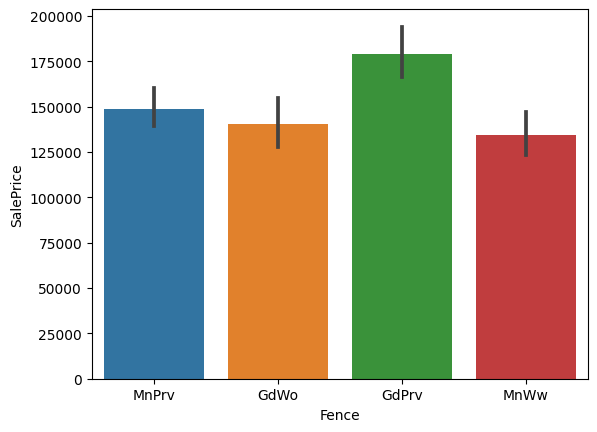

             TARGET_MEAN
MiscFeature             
Gar2          170750.000
Othr           94000.000
Shed          151187.612
TenC          250000.000




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


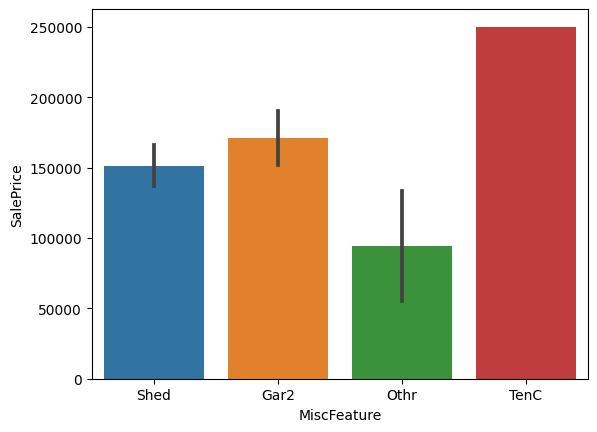

          TARGET_MEAN
SaleType             
COD        143973.256
CWD        210600.000
Con        269600.000
ConLD      138780.889
ConLI      200390.000
ConLw      143700.000
New        274945.418
Oth        119850.000
WD         173401.837




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


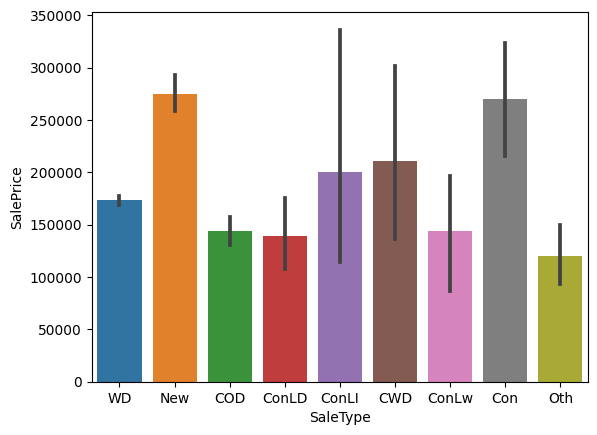

               TARGET_MEAN
SaleCondition             
Abnorml         146526.624
AdjLand         104125.000
Alloca          167377.417
Family          149600.000
Normal          175202.220
Partial         272291.752




/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


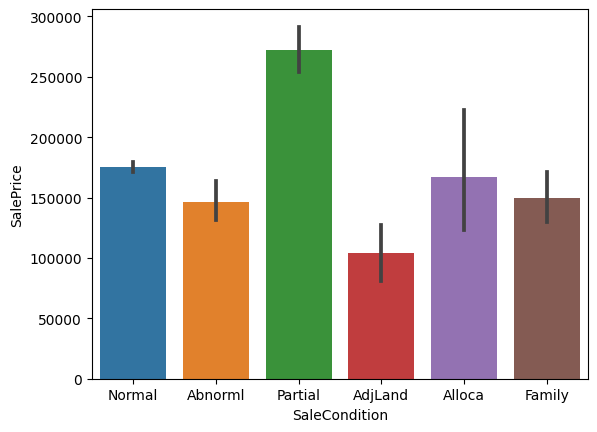

In [19]:
for col in cat_cols:
    target_summary_with_cat(df, "SalePrice", col, plot=True)

## 相関分析


In [20]:
# corr()：カラム（数値型）同士の相関関係を計算
corr = df[num_cols].corr()
corr

Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
Id           1.000       0.009       -0.028   -0.041       -0.030   
MSSubClass   0.009       1.000       -0.417   -0.202        0.034   
LotFrontage -0.028      -0.417        1.000    0.490        0.218   
LotArea     -0.041      -0.202        0.490    1.000        0.101   
OverallQual -0.030       0.034        0.218    0.101        1.000   
...            ...         ...          ...      ...          ...   
PoolArea     0.014      -0.003        0.174    0.094        0.031   
MiscVal      0.008      -0.029        0.044    0.069        0.006   
MoSold       0.006      -0.001        0.011    0.004        0.030   
YrSold      -0.256      -0.015       -0.008   -0.024       -0.020   
SalePrice   -0.022      -0.084        0.352    0.264        0.791   

             OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                -0.003     -0.017        -0.050      -0.025      -0.017   
MSSubClass        -0.066      0.034         0.043       0.005      -0.064   
LotFrontage       -0.076      0.123         0.092       0.221       0.219   
LotArea           -0.036      0.024         0.022       0.126       0.194   
OverallQual       -0.094      0.598         0.572       0.433       0.282   
...                  ...        ...           ...         ...         ...   
PoolArea          -0.017      0.002        -0.011       0.005       0.084   
MiscVal            0.034     -0.011        -0.003       0.045       0.093   
MoSold            -0.006      0.014         0.018      -0.000      -0.001   
YrSold             0.030     -0.012         0.033      -0.019       0.023   
SalePrice         -0.078      0.523         0.507       0.477       0.386   

             BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
Id                0.018     -0.014       -0.025    -0.009    -0.022   
MSSubClass       -0.073     -0.126       -0.220    -0.249     0.309   
LotFrontage       0.047      0.114        0.355     0.458     0.027   
LotArea           0.084      0.021        0.254     0.332     0.032   
OverallQual      -0.043      0.275        0.549     0.479     0.246   
...                 ...        ...          ...       ...       ...   
PoolArea          0.045     -0.032        0.072     0.122     0.045   
MiscVal          -0.005     -0.010        0.084     0.093    -0.005   
MoSold           -0.010      0.023        0.018     0.040     0.014   
YrSold            0.009     -0.038       -0.011    -0.013    -0.019   
SalePrice        -0.011      0.214        0.614     0.606     0.319   

             LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                 -0.038     -0.029         0.000         0.010    -0.010   
MSSubClass          0.026      0.072         0.010        -0.002     0.139   
LotFrontage         0.005      0.382         0.113        -0.026     0.182   
LotArea             0.001      0.285         0.128         0.026     0.126   
OverallQual        -0.048      0.575         0.165        -0.041     0.528   
...                   ...        ...           ...           ...       ...   
PoolArea            0.035      0.135         0.044         0.067     0.028   
MiscVal            -0.006      0.067        -0.005         0.037    -0.010   
MoSold              0.012      0.044        -0.004         0.023     0.046   
YrSold             -0.002     -0.027         0.045        -0.020    -0.005   
SalePrice          -0.026      0.709         0.227        -0.017     0.561   

             HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id             -0.015         0.003        -0.012        -0.029      -0.035   
MSSubClass      0.179        -0.009         0.260         0.041      -0.055   
LotFrontage     0.039         0.235         0.005         0.350       0.262   
LotArea         0.034         0.133        -0.021         0.214       0.261   
OverallQual     0.273         0.073        -0.159         0.390       0.391  

In [21]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs() # 相関係数の絶対値
    upper_triangle_matrix = cor_matrix.where(
        np.triu(np.ones(cor_matrix.shape),  # 上三角行列を作成
        k=1 # 上三角行列の対角線を1にする
    ).astype(bool)) # 上三角行列をブール型に変換
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        plt.figure(figsize=(18, 18))
        corr_values = corr.round(2)
        sns.heatmap(corr, cmap="RdBu", annot=corr_values)
        plt.show(block=True)
    return drop_list

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


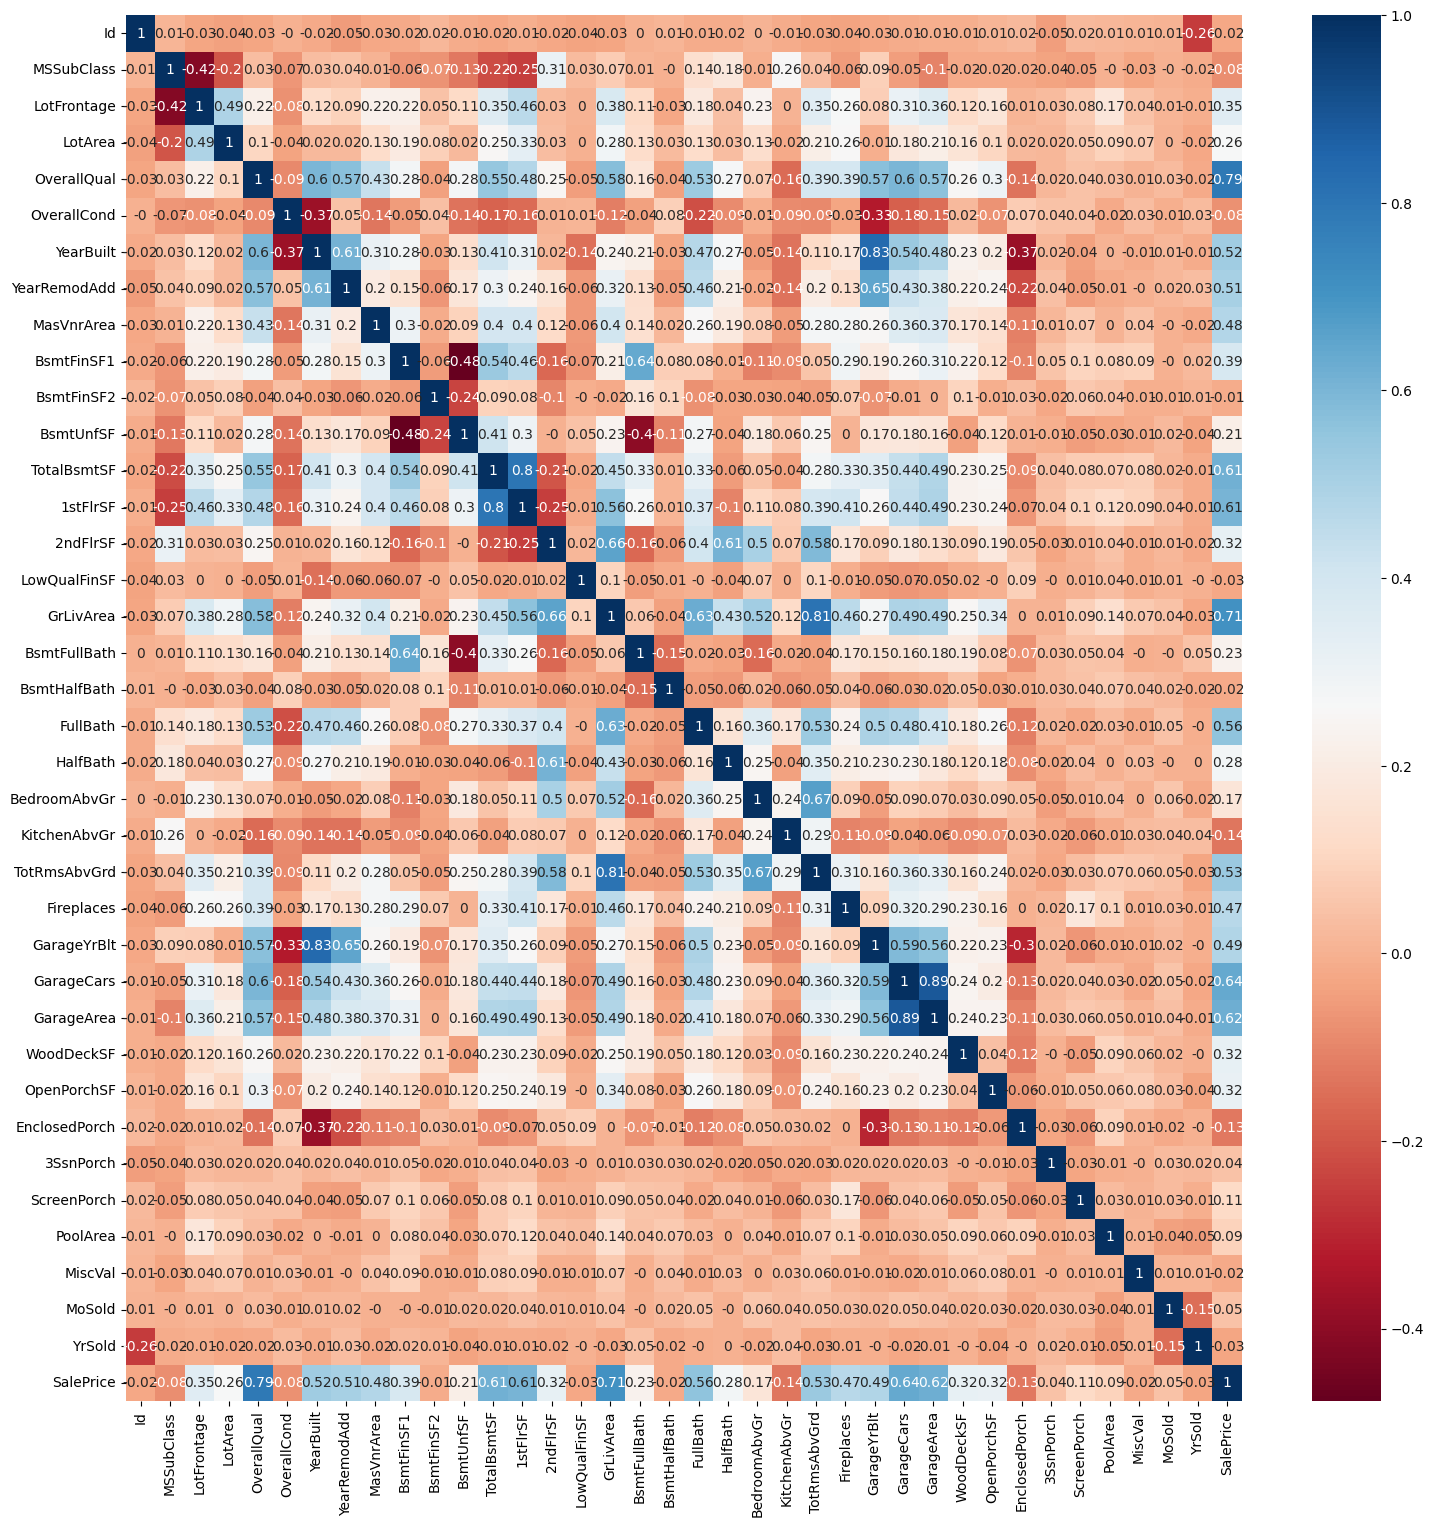

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [22]:
high_correlated_cols(df[num_cols], plot=True)

## 外れ値の分析

In [23]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1) # 第1四分位数
    quartile3 = dataframe[col_name].quantile(q3) # 第3四分位数
    interquantile_range = quartile3 - quartile1 # 四分位範囲（IQR）
    up_limit = quartile3 + 1.5 * interquantile_range # 外れ値を検出するための上限値
    low_limit = quartile1 - 1.5 * interquantile_range # 外れ値を検出するための下限値
    return low_limit, up_limit

In [24]:
def check_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]# 外れ値を検出
    # 行と列で、一つでもTrueがあればTrueを返す
    if outliers.any(axis=None):
        if plot:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
        return True
    else:
        return False

In [25]:
def replace_with_thresholds(dataframe, variable, q1=0.5, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [26]:
for col in num_cols:
    if col != "SalePrice":
        print(col, ':', check_outlier(df, col))

Id : False
MSSubClass : False
LotFrontage : True
LotArea : True
OverallQual : False
OverallCond : False
YearBuilt : False
YearRemodAdd : False
MasVnrArea : True
BsmtFinSF1 : True
BsmtFinSF2 : True
BsmtUnfSF : False
TotalBsmtSF : True
1stFlrSF : True
2ndFlrSF : False
LowQualFinSF : True
GrLivArea : True
BsmtFullBath : True
BsmtHalfBath : False
FullBath : True
HalfBath : False
BedroomAbvGr : True


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

KitchenAbvGr : True
TotRmsAbvGrd : False
Fireplaces : False
GarageYrBlt : True
GarageCars : False
GarageArea : False
WoodDeckSF : True
OpenPorchSF : True
EnclosedPorch : True
3SsnPorch : True
ScreenPorch : True
PoolArea : True
MiscVal : True
MoSold : False
YrSold : False


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [27]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df, col)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

In [28]:
for col in num_cols:
    if col != "SalePrice":
        print(col, ':', check_outlier(df, col))

Id : False
MSSubClass : False
LotFrontage : False
LotArea : False
OverallQual : False
OverallCond : False
YearBuilt : False
YearRemodAdd : False
MasVnrArea : False
BsmtFinSF1 : False
BsmtFinSF2 : False
BsmtUnfSF : False
TotalBsmtSF : False
1stFlrSF : False
2ndFlrSF : False
LowQualFinSF : False
GrLivArea : False
BsmtFullBath : False
BsmtHalfBath : False
FullBath : False


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

HalfBath : False
BedroomAbvGr : False
KitchenAbvGr : False
TotRmsAbvGrd : False
Fireplaces : False
GarageYrBlt : False
GarageCars : False
GarageArea : False
WoodDeckSF : False
OpenPorchSF : False
EnclosedPorch : False
3SsnPorch : False
ScreenPorch : False
PoolArea : False
MiscVal : False
MoSold : False
YrSold : False


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [29]:
df.describe().T

count       mean       std       min        25%        50%  \
Id          2919.000   1460.000   842.787     1.000    730.500   1460.000   
MSSubClass  2919.000     57.138    42.518    20.000     20.000     50.000   
LotFrontage 2433.000     69.229    22.687    21.000     59.000     68.000   
LotArea     2919.000   9917.990  4849.927  1300.000   7478.000   9453.000   
OverallQual 2919.000      6.089     1.410     1.000      5.000      6.000   
...              ...        ...       ...       ...        ...        ...   
PoolArea    2919.000      0.000     0.000     0.000      0.000      0.000   
MiscVal     2919.000      0.000     0.000     0.000      0.000      0.000   
MoSold      2919.000      6.213     2.715     1.000      4.000      6.000   
YrSold      2919.000   2007.793     1.315  2006.000   2007.000   2008.000   
SalePrice   1460.000 180921.196 79442.503 34900.000 129975.000 163000.000   

                   75%        max  
Id            2189.500   2919.000  
MSSubClass      70.000    190.000  
LotFrontage     80.000    219.500  
LotArea      11570.000  38084.250  
OverallQual      7.000     10.000  
...                ...        ...  
PoolArea         0.000      0.000  
MiscVal          0.000      0.000  
MoSold           8.000     12.000  
YrSold        2009.000   2010.000  
SalePrice   214000.000 755000.000  

[38 rows x 8 columns]

## 欠損値の分析


In [30]:
def missing_values_table(dataframe, na_name=False):
    # 欠損値のある項目を抽出
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    # 欠損値の数を降順でソート
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    # 欠損値の数を全体のデータ数で割って、割合を計算
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    # 欠損値の数と割合を結合
    # np.round()：欠損値を丸める処理（小数点第3位を四捨五入し、小数点第2位まで表示）
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    # 欠損値の数と割合を表示
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [31]:
missing_values_table(df)

             n_miss  ratio
PoolQC         2909 99.660
MiscFeature    2814 96.400
Alley          2721 93.220
Fence          2348 80.440
MasVnrType     1766 60.500
...             ...    ...
BsmtFinSF1        1  0.030
Exterior2nd       1  0.030
Exterior1st       1  0.030
SaleType          1  0.030
Electrical        1  0.030

[35 rows x 2 columns]


In [32]:
# 欠損値の補完(imputation)
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  

    # カテゴリ変数の欠損地をモード（最頻値）で補完
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # 数値変数の欠損地を平均値で補完
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # 数値変数の欠損地を中央値で補完
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n  カテゴリ変数を最頻値で補完")
    print("  数値変数を" + num_method.upper() + "で補完")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [33]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
MSZoning          4
LotFrontage     486
Alley          2721
Utilities         2
Exterior1st       1
               ... 
PoolQC         2909
Fence          2348
MiscFeature    2814
SaleType          1
SalePrice      1459
Length: 35, dtype: int64 


# AFTER 
  カテゴリ変数を最頻値で補完
  数値変数をMEDIANで補完
MSZoning          0
LotFrontage       0
Alley             0
Utilities         0
Exterior1st       0
               ... 
PoolQC            0
Fence             0
MiscFeature       0
SaleType          0
SalePrice      1459
Length: 35, dtype: int64 




## レア分析

In [34]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        # 各ユニークな値の出現回数
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({
            'COUNT': dataframe[col].value_counts(), # 出現回数
            'RATIO': dataframe[col].value_counts() / len(dataframe), # 全体に対する出現割合(出現数/総データ)
            'TARGET_MEAN': dataframe.groupby(col)[target].mean() # 目的変数カラムの平均値
        }), end='\n\n\n')

In [35]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
C (all)      25  0.009    74528.000
FV          139  0.048   214014.062
RH           26  0.009   131558.375
RL         2269  0.777   191004.995
RM          460  0.158   126316.830


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Grvl       12  0.004   130190.500
Pave     2907  0.996   181130.539


Alley : 2
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl    2841  0.973   181294.519
Pave      78  0.027   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968  0.332   206101.665
IR2          76  0.026   239833.366
IR3          16  0.005   216036.500
Reg        1859  0.637   164754.818


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            117  0.040   143104.079
HLS            120  0.041   231533.940
Low             60  0.021   203661.11

In [36]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == '0'
                    and (temp_df[col].value_counts()/len(temp_df) < rare_perc ).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [37]:
rare_encoder(df, 0.01)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley  \
0       1.000          60       RL       65.000  8450.000   Pave  Grvl   
1       2.000          20       RL       80.000  9600.000   Pave  Grvl   
2       3.000          60       RL       68.000 11250.000   Pave  Grvl   
3       4.000          70       RL       60.000  9550.000   Pave  Grvl   
4       5.000          60       RL       84.000 14260.000   Pave  Grvl   
...       ...         ...      ...          ...       ...    ...   ...   
2914 2915.000         160       RM       21.000  1936.000   Pave  Grvl   
2915 2916.000         160       RM       21.000  1894.000   Pave  Grvl   
2916 2917.000          20       RL      160.000 20000.000   Pave  Grvl   
2917 2918.000          85       RL       62.000 10441.000   Pave  Grvl   
2918 2919.000          60       RL       74.000  9627.000   Pave  Grvl   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
2914      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
2915      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
2916      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
2917      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
2918      Reg         Lvl    AllPub    Inside       Mod      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
2914       Norm       Norm    Twnhs     2Story            4            7   
2915       Norm       Norm   TwnhsE     2Story            4            5   
2916       Norm       Norm     1Fam     1Story            5            7   
2917       Norm       Norm     1Fam     SFoyer            5            5   
2918       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003      2003.000     Gable  CompShg     VinylSd     VinylSd   
1          1976      1976.000     Gable  CompShg     MetalSd     MetalSd   
2          2001      2002.000     Gable  CompShg     VinylSd     VinylSd   
3          1915      1970.000     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000      2000.000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
2914       1970      1970.000     Gable  CompShg     CemntBd     CmentBd   
2915       1970      1970.000     Gable  CompShg     CemntBd     CmentBd   
2916       1960      1996.000     Gable  CompShg     VinylSd     VinylSd   
2917       1992      1992.000     Gable  CompShg     HdBoard     Wd Shng   
2918       1993      1994.000     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace     196.000        Gd        TA      PConc       Gd       TA   
1       BrkFace       0.000        TA        TA     CBlock       Gd       TA   
2       BrkFace     162.000        Gd        TA      PConc       Gd       TA   
3       BrkFace       0.000        TA        TA     BrkTil       TA       Gd   
4       BrkFace     350.000    

## 特徴量の抽出

In [38]:
df['overall cond-qual'] = df['OverallQual'] + df['OverallCond']
df['YearRemodAdd-YearBuilt '] = df['YearRemodAdd'] - df['YearBuilt']
df['first-secondFlrSf'] = df['1stFlrSF'] + df['2ndFlrSF']
df['BsmtBaths'] = df['BsmtFullBath'] + df['BsmtHalfBath']*  0.5
df['AboveBaths'] = df['FullBath'] + df['HalfBath'] * 0.5
df['TotalBaths'] = df['BsmtBaths'] + df['AboveBaths']
df['PorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [39]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [40]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0 1.000          60       RL       65.000  8450.000   Pave  Grvl      Reg   
1 2.000          20       RL       80.000  9600.000   Pave  Grvl      Reg   
2 3.000          60       RL       68.000 11250.000   Pave  Grvl      IR1   
3 4.000          70       RL       60.000  9550.000   Pave  Grvl      IR1   
4 5.000          60       RL       84.000 14260.000   Pave  Grvl      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      2003.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      1976.000     Gable  CompShg     MetalSd     MetalSd    BrkFace   
2      2002.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      1970.000     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace   
4      2000.000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ     706.000          Unf       0.000    150.000      856.000   
1          ALQ     978.000          Unf       0.000    284.000     1262.000   
2          GLQ     486.000          Unf       0.000    434.000      920.000   
3          ALQ     216.000          Unf       0.000    540.000      756.000   
4          GLQ     655.000          Unf       0.000    490.000     1145.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr   856.000   854.000             0   
1    GasA        Ex          Y      SBrkr  1262.000     0.000             0   
2    GasA        Ex          Y      SBrkr   920.000   866.000             0   
3    GasA        Gd          Y      SBrkr   961.000   756.000             0   
4    GasA        Ex          Y      SBrkr  1145.000  1053.000             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   1710.000         1.000         0.000     2.000     1.000             3   
1   1262.000         0.000         1.000     2.000     0.000             3   
2   1786.000         1.000         0.000     2.000     1.000             3   
3   1717.000         1.000         0.000     1.000     0.000             3   
4   2198.000         1.000         0.000     2.000     1.000             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd         8.000        Typ           0          Gd   
1             1          TA         6.000        Typ           1          TA   
2             1          Gd         6.000        Typ           1          TA   
3             1        

In [41]:
# 野外スペースがある = 高級住宅
df["outdoor"] = (df["WoodDeckSF"] + df["OpenPorchSF"])**2

In [42]:
# プール面積が０より大きい
pool_homes = df[df["PoolArea"] > 0]  
pool_homes

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, overall cond-qual, YearRemodAdd-YearBuilt , first-secondFlrSf, BsmtBaths, AboveBaths, TotalBaths, PorchArea, outdoor]
Index: []

In [43]:
# 合計部屋数
df["total_area"] = df["FullBath"] + df["HalfBath"] + df["BedroomAbvGr"] + df["KitchenAbvGr"] + df["GarageCars"]

In [44]:
# 建築年数、改修、ガレージ増築
df["built_reform"] = df["YearBuilt"] + df["YearRemodAdd"] + df["GarageYrBlt"]
df["built_reform"]

0      6009.000
1      5928.000
2      6004.000
3      5883.000
4      6000.000
         ...   
2914   5919.000
2915   5910.000
2916   5916.000
2917   5963.000
2918   5980.000
Name: built_reform, Length: 2919, dtype: float64

In [45]:
# 総合スコア（総合的な品質 * 総合的な状態）
df["overall"] = df['OverallQual'] * df['OverallCond']

In [46]:
df["total_area"] = (df["GrLivArea"]) * (df["1stFlrSF"] + 1) * (df["2ndFlrSF"] + 1) * (df["TotalBsmtSF"] + 1)
df["total_area"]

0      1073801160450.000
1         2013103278.000
2      1313468955342.000
3       946535977946.000
4      3042548670672.000
              ...       
2914    178724716716.000
2915    178724716716.000
2916      1836765000.000
2917       859927310.000
2918   1997958090000.000
Name: total_area, Length: 2919, dtype: float64

## 従属変数の分布

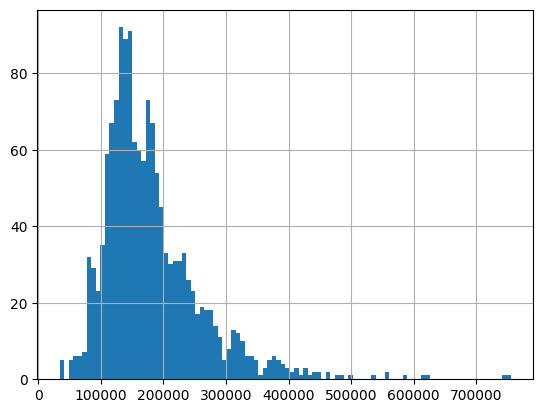

In [47]:
df["SalePrice"].hist(bins=100)
plt.show(block=True)

## 従属変数の対数

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


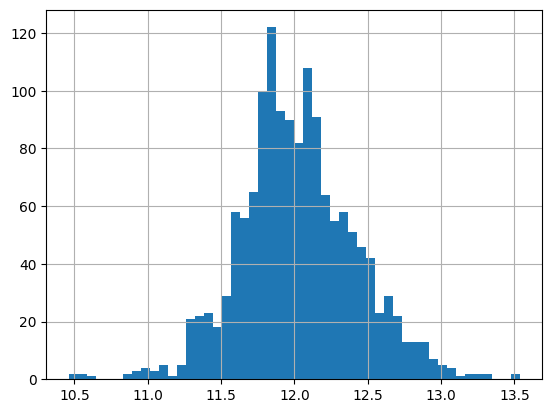

In [48]:
np.log1p(df['SalePrice']).hist(bins=50)
plt.show(block=True)

## 新しい特徴量における相関分析

In [49]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 92
cat_cols: 42
num_cols: 49
cat_but_car: 1
num_but_cat: 0


In [50]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [51]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'overall cond-qual',
 'YearRemodAdd-YearBuilt ',
 'first-secondFlrSf',
 'BsmtBaths',
 'AboveBaths',
 'TotalBaths',
 'PorchArea',
 'outdoor',
 'total_area',
 'built_reform',
 'overall']

In [52]:
def hight_correlated_cols(df, num_cols, threshold=0.8, plot=False):
    # 相関係数を計算
    corr_matrix = df[num_cols].corr()

    # 相関関係の高い項目を格納するリスト
    high_corr = []
    for col in corr_matrix.columns:
        for row in corr_matrix.index:
            if abs(corr_matrix.loc[row, col]) > threshold and row != col:
                # 行列を作成
                high_corr.append((row, col, corr_matrix.loc[row, col]))

    # タプルに変換し、重複をなくした後、再度リストに変換する
    high_corr = list(set(high_corr))

    if plot:
        plt.figure(figsize=(30,30))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('相関ヒートマップ')
        plt.show()

    return high_corr

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12498 (\N{KATAKANA LETTER HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py

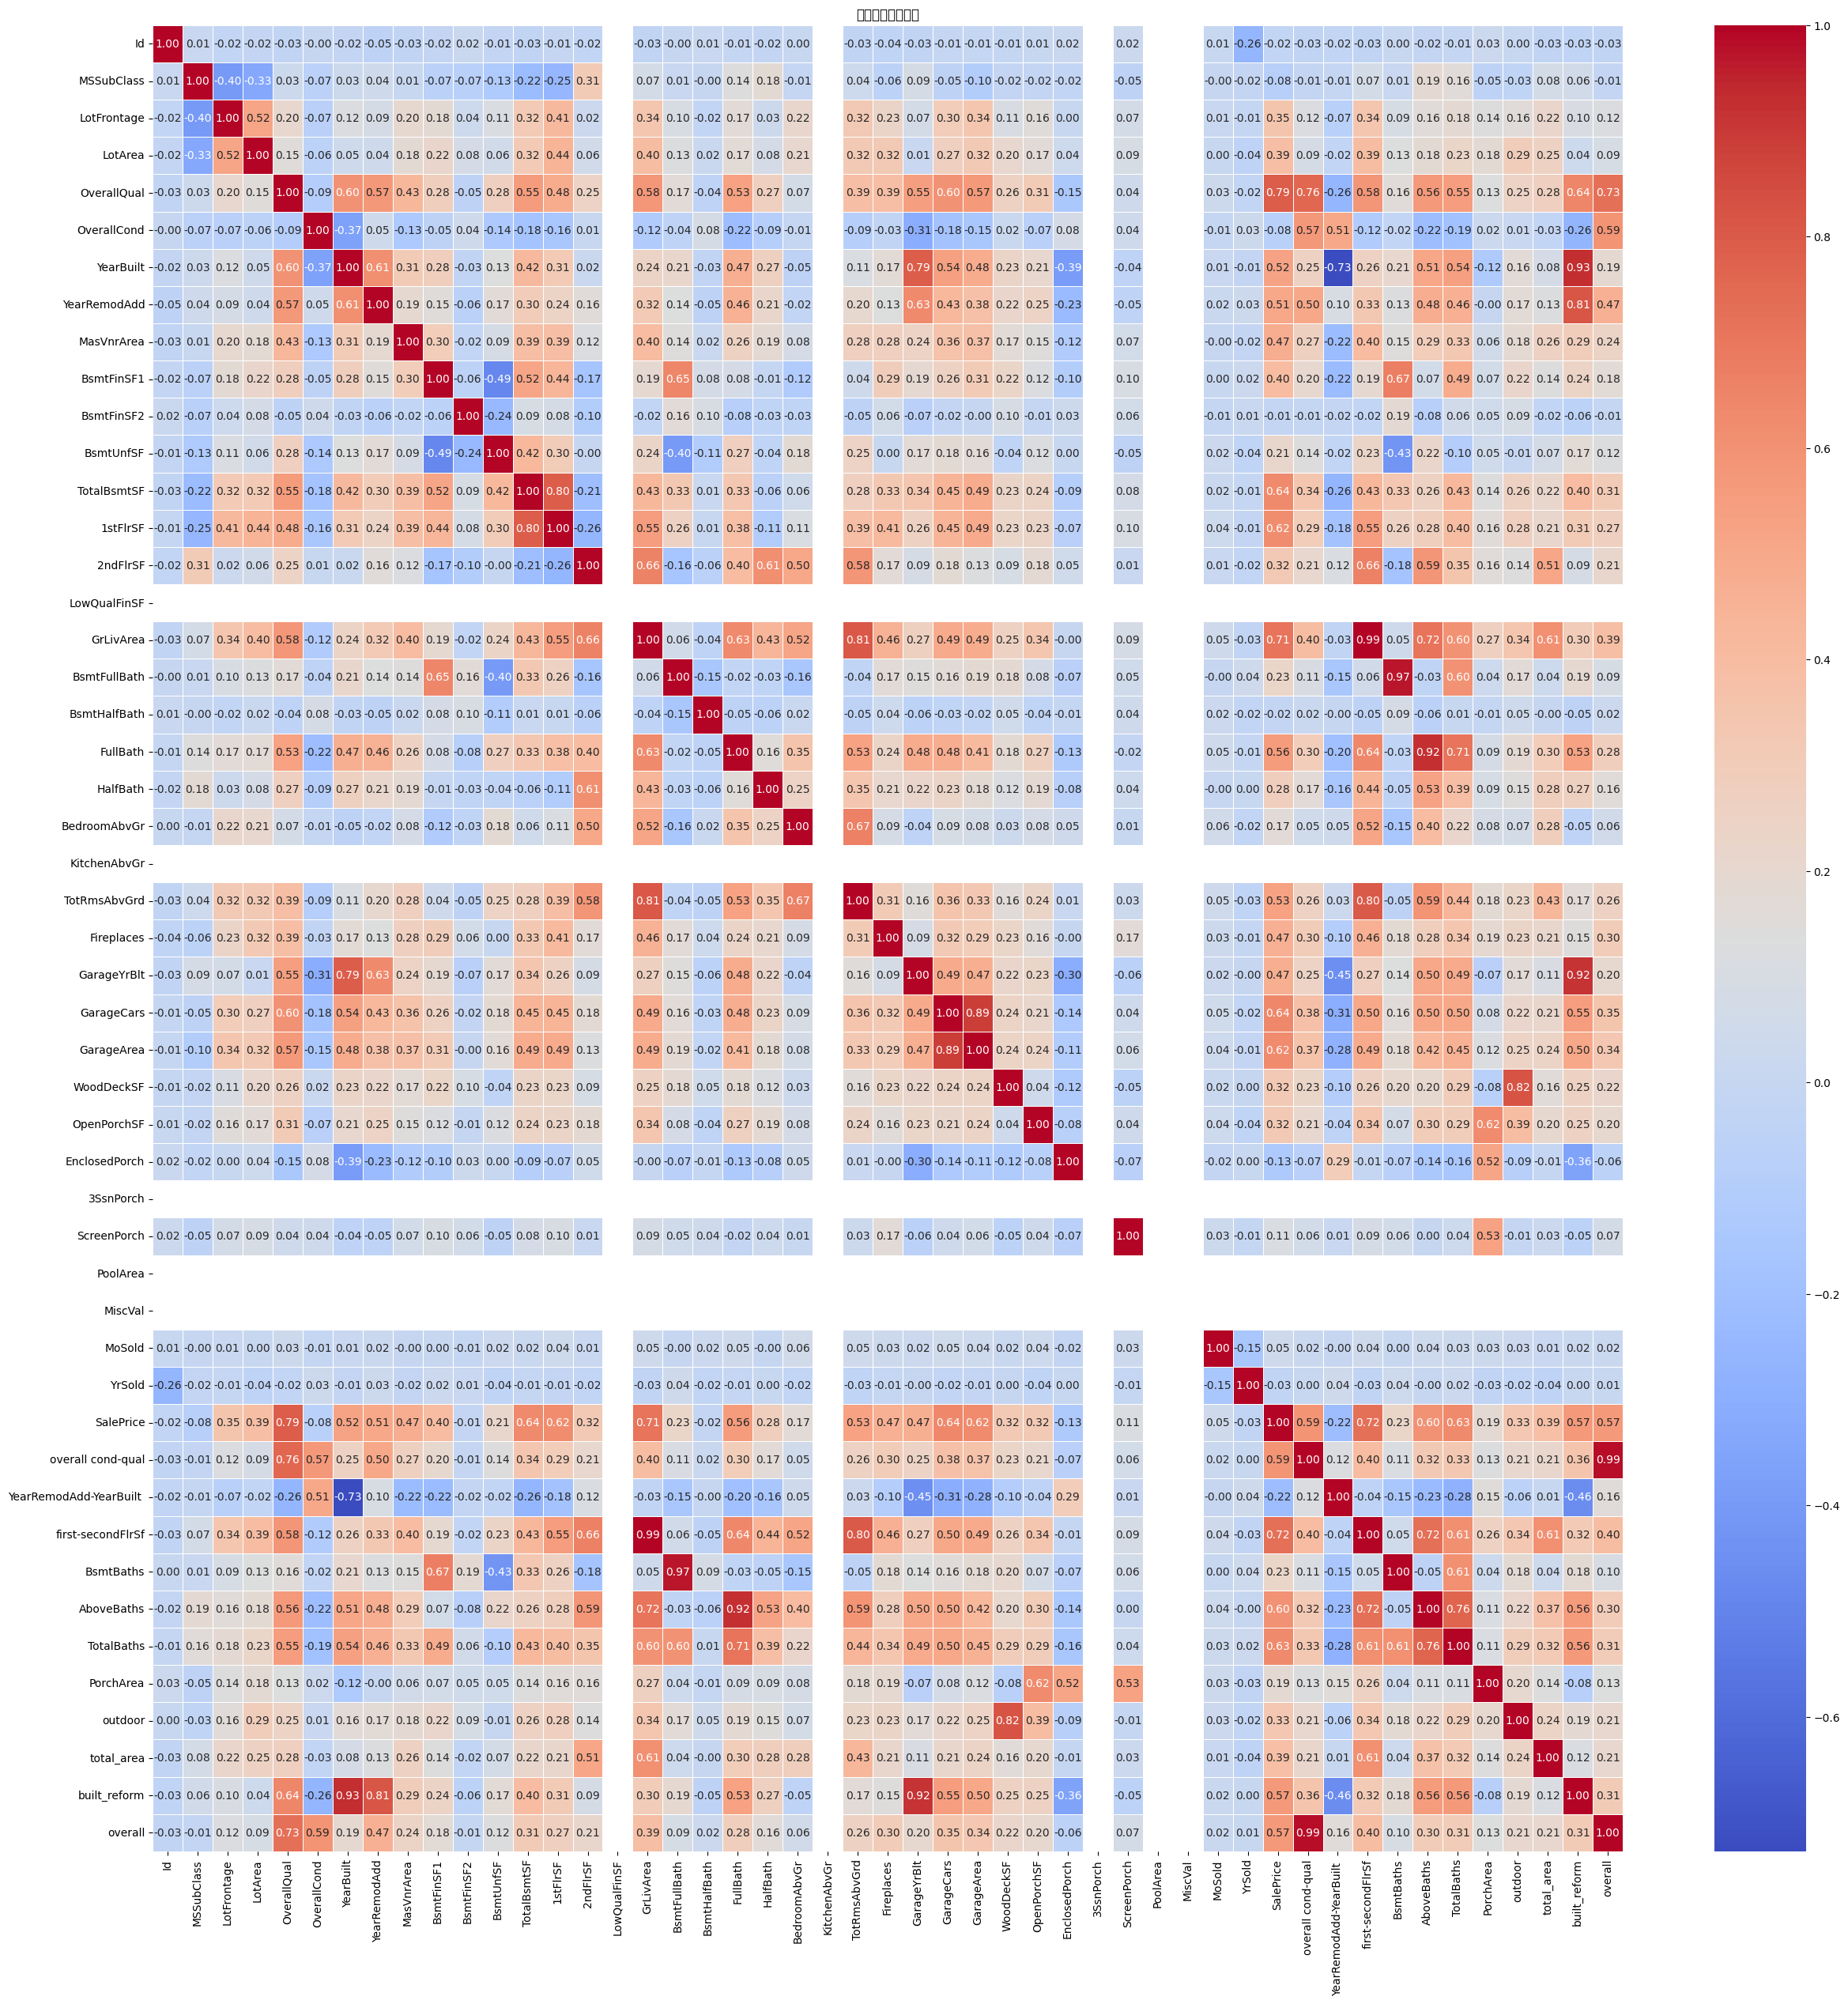

[('BsmtFullBath', 'BsmtBaths', 0.97227105742508),
 ('GarageCars', 'GarageArea', 0.8896894076828877),
 ('GarageArea', 'GarageCars', 0.8896894076828877),
 ('AboveBaths', 'FullBath', 0.9214799973996358),
 ('first-secondFlrSf', 'GrLivArea', 0.9945241771592814),
 ('YearBuilt', 'built_reform', 0.9265764938425863),
 ('GrLivArea', 'first-secondFlrSf', 0.9945241771592814),
 ('GarageYrBlt', 'built_reform', 0.9150310303817417),
 ('TotRmsAbvGrd', 'GrLivArea', 0.8096774254098329),
 ('BsmtBaths', 'BsmtFullBath', 0.97227105742508),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8096774254098329),
 ('built_reform', 'YearRemodAdd', 0.8131649671203368),
 ('YearRemodAdd', 'built_reform', 0.8131649671203368),
 ('overall', 'overall cond-qual', 0.9853289139295996),
 ('built_reform', 'YearBuilt', 0.9265764938425863),
 ('built_reform', 'GarageYrBlt', 0.9150310303817417),
 ('first-secondFlrSf', 'TotRmsAbvGrd', 0.8036421454638445),
 ('FullBath', 'AboveBaths', 0.9214799973996358),
 ('TotRmsAbvGrd', 'first-secondFlrSf', 0.8036

In [53]:
hight_correlated_cols(df, num_cols, plot=True)

## エンコーディング

LabelEncoder(２種類の値しかないカラム)

In [54]:
# lable encoding
def label_encoder(dataframe, binary_col):
    le = LabelEncoder()
    dataframe[binary_col] = le.fit_transform(dataframe[binary_col])
    return dataframe

In [55]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['Street', 'Alley', 'Utilities', 'CentralAir']

In [56]:
for col in binary_cols:
    label_encoder(df, col)

one-hot encoding(3値以上のカラム)

In [57]:
cat_cols = [col for col in cat_cols if col not in binary_cols]
cat_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [58]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [59]:
df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

Id  MSSubClass  LotFrontage   LotArea  Street  Alley  Utilities  \
0 1.000          60       65.000  8450.000       1      0          0   
1 2.000          20       80.000  9600.000       1      0          0   
2 3.000          60       68.000 11250.000       1      0          0   
3 4.000          70       60.000  9550.000       1      0          0   
4 5.000          60       84.000 14260.000       1      0          0   

  Neighborhood  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0      CollgCr            7            5       2003      2003.000     196.000   
1      Veenker            6            8       1976      1976.000       0.000   
2      CollgCr            7            5       2001      2002.000     162.000   
3      Crawfor            7            5       1915      1970.000       0.000   
4      NoRidge            8            5       2000      2000.000     350.000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
0     706.000       0.000    150.000      856.000           1   856.000   
1     978.000       0.000    284.000     1262.000           1  1262.000   
2     486.000       0.000    434.000      920.000           1   920.000   
3     216.000       0.000    540.000      756.000           1   961.000   
4     655.000       0.000    490.000     1145.000           1  1145.000   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0   854.000             0   1710.000         1.000         0.000     2.000   
1     0.000             0   1262.000         0.000         1.000     2.000   
2   866.000             0   1786.000         1.000         0.000     2.000   
3   756.000             0   1717.000         1.000         0.000     1.000   
4  1053.000             0   2198.000         1.000         0.000     2.000   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0     1.000             3             1         8.000           0   
1     0.000             3             1         6.000           1   
2     1.000             3             1         6.000           1   
3     0.000             3             1         7.000           1   
4     1.000             4             1         9.000           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     2003.000       2.000     548.000           0       61.000   
1     1976.000       2.000     460.000         298        0.000   
2     2001.000       2.000     608.000           0       42.000   
3     1998.000       3.000     642.000           0       35.000   
4     2000.000       3.000     836.000         192       84.000   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0        0.000         0        0   2.000    2008   
1              0          0        0.000         0        0   5.000    2007   
2              0          0        0.000         0        0   9.000    2008   
3            272          0        0.000         0        0   2.000    2006   
4              0          0        0.000         0        0  12.000    2008   

   SalePrice  overall cond-qual  YearRemodAdd-YearBuilt   first-secondFlrSf  \
0 208500.000                 12                    0.000           1710.000   
1 181500.000                 14                    0.000           1262.000   
2 223500.000                 12                    1.000           1786.000   
3 140000.000                 12                   55.000           1717.000   
4 250000.000                 13                    0.000           2198.000   

   BsmtBaths  AboveBaths  TotalBaths  PorchArea   outdoor        total_area  \
0      1.000       2.500       3.500     61.000  3721.000 1073801160450.000   
1      0.500       2.000       2.500      0.000 88804.000    2013103278.000   
2      1.000       2.500       3.500     42.000  1764.000 1313468955342.000   
3      1.000       1.000       2.000    307.000  1225.000  946535977946.000   
4 

## モデリング

In [60]:
df = df.drop(["Neighborhood"], axis=1)

In [61]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [62]:
print(train_df.head())
print(train_df['SalePrice'])

     Id  MSSubClass  LotFrontage   LotArea  Street  Alley  Utilities  \
0 1.000          60       65.000  8450.000       1      0          0   
1 2.000          20       80.000  9600.000       1      0          0   
2 3.000          60       68.000 11250.000       1      0          0   
3 4.000          70       60.000  9550.000       1      0          0   
4 5.000          60       84.000 14260.000       1      0          0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            7            5       2003      2003.000     196.000     706.000   
1            6            8       1976      1976.000       0.000     978.000   
2            7            5       2001      2002.000     162.000     486.000   
3            7            5       1915      1970.000       0.000     216.000   
4            8            5       2000      2000.000     350.000     655.000   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  \
0       0.000

In [63]:
y = train_df['SalePrice']
X = train_df.drop(['Id', 'SalePrice'], axis=1) # Idカラムは意味のないデータなので一緒に削除

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    # 交差検証によるRMSE(二乗平均誤差)
    # cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error"): モデル（regressor）に対し、X・yを5分割し、各分割で、MSE（平均二乗誤算）を計算
    # ただし scoring="neg_mean_squared_error" なので、スコアはマイナスMSE
    # np.sqrt(-...)  # → MSEを正に戻してから平方根
    # np.mean(...)   # → 各foldのRMSEを平均して最終RMSEに
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot RMSE scores
plt.figure(figsize=(12, 8))
# Exclude LR from the plot
filtered_scores = [score for name, score in zip([name for name, _ in models], rmse_scores) if name != 'LR']
plt.bar([name for name, _ in models if name != 'LR'], filtered_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot execution times
plt.figure(figsize=(12, 8))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Model")
plt.title("Execution Times for Different Models")
plt.show()

RMSE: 84827.1668 (LR)
Execution Time: 2.76 seconds



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.41796e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.37159e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.70547e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.92498e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

RMSE: 65219.4129 (Ridge)
Execution Time: 1.4 seconds

RMSE: 47326.9369 (Lasso)
Execution Time: 24.52 seconds

RMSE: 34938.0568 (ElasticNet)
Execution Time: 21.8 seconds

RMSE: 48668.677 (KNN)
Execution Time: 2.02 seconds

RMSE: 42571.5542 (CART)
Execution Time: 1.02 seconds

RMSE: 29296.0845 (RF)
Execution Time: 47.44 seconds

RMSE: 26057.7169 (GBM)
Execution Time: 15.01 seconds

RMSE: 29277.7152 (XGBoost)
Execution Time: 19.54 seconds

RMSE: 29295.8408 (LightGBM)
Execution Time: 6.33 seconds




### RMSEの２パターン
mean_squared_error()+sqrt()
```python
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
```


cross_val_score(..., scroring="neg_mean_squared_error)
```python
rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
```

**「交差検証を使って RMSE を求めている」**という点で、  
`np.sqrt(mean_squared_error(y_true, y_pred))` と**目的は同じ（RMSEを算出する）**ですが、  
**処理のスコープや方法に違い**があります。

### ✅ 両者の違いを比較

| 項目 | `mean_squared_error()` + `sqrt()` | `cross_val_score(..., scoring="neg_mean_squared_error")` |
|------|-----------------------------------|-----------------------------------------------------------|
| 用途 | モデル1回分の性能評価 | 汎化性能を確認（交差検証） |
| 出力 | 単一のRMSE | 各foldのRMSE平均 |
| 正確性 | 一時的・限定的 | 一般化性能に強い評価 |
| オススメ度 | 学習後のスナップショット評価向き | モデルの比較・選定に有効 ✅ |


#### mean_squared_error() + sqrt()を用いて、同じことを実現
mean_squared_error()+sqrt()
```python
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

rmses = []
for train_idx, valid_idx in KFold(n_splits=5).split(X):
    X_train, X_valid = X[train_idx], X[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    rmses.append(rmse)

final_rmse = np.mean(rmses)
```


## 対数変換
- SalePrice は通常、右に長い（右裾が重い）分布をしていて、正規分布ではありません。
- 多くの回帰モデル（特に線形回帰系）は、目的変数が正規分布に近いほうがうまく機能するため、対数変換で分布を正規に近づけるのです。

RMSE: 0.2659 (LR)
Execution Time: 2.66 seconds



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.41796e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.37159e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.70547e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.92498e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

RMSE: 0.2137 (Ridge)
Execution Time: 1.51 seconds

RMSE: 0.1751 (Lasso)
Execution Time: 4.31 seconds

RMSE: 0.1607 (ElasticNet)
Execution Time: 4.6 seconds

RMSE: 0.2427 (KNN)
Execution Time: 1.58 seconds

RMSE: 0.2081 (CART)
Execution Time: 0.9 seconds

RMSE: 0.1406 (RF)
Execution Time: 46.62 seconds

RMSE: 0.1264 (GBM)
Execution Time: 15.98 seconds

RMSE: 0.1449 (XGBoost)
Execution Time: 19.43 seconds

RMSE: 0.134 (LightGBM)
Execution Time: 4.8 seconds

RMSE: 0.1229 (CatBoost)
Execution Time: 120.73 seconds



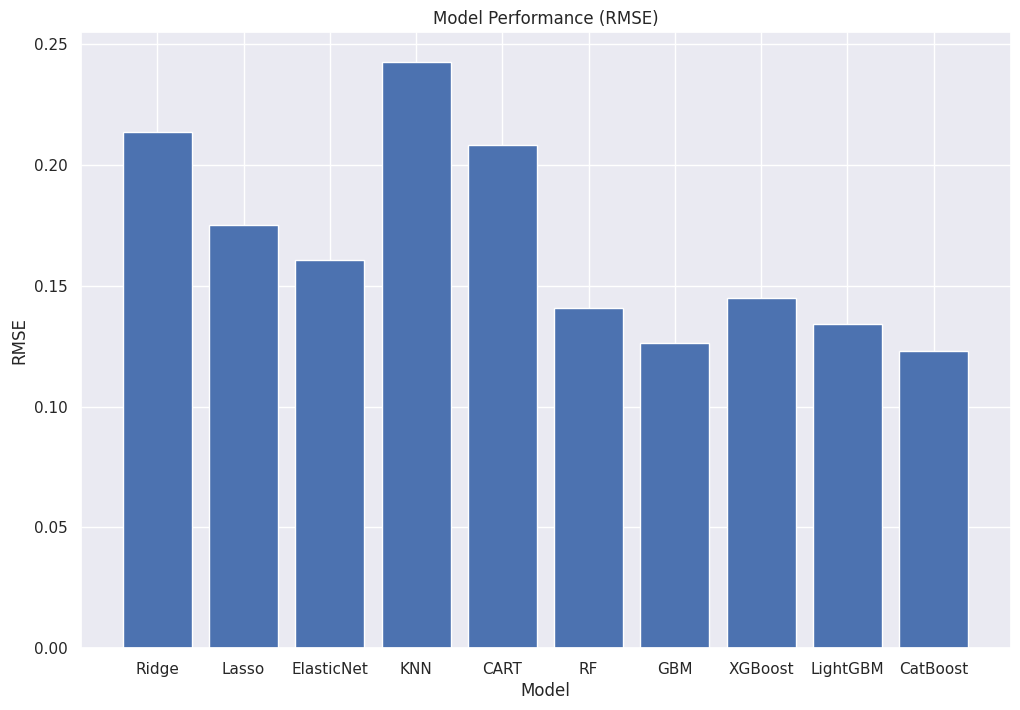

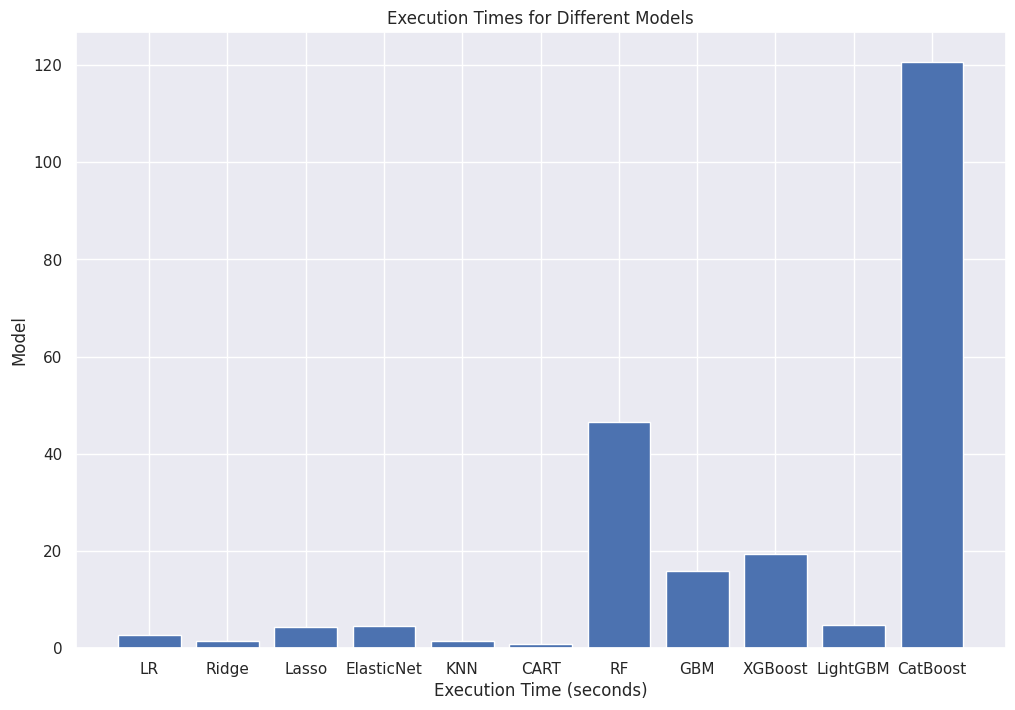

In [103]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

# 対数変換
y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
execution_times = []

# Train and evaluate the models
for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot RMSE scores
plt.figure(figsize=(12, 8))
# Exclude LR from the plot
filtered_scores = [score for name, score in zip([name for name, _ in models], rmse_scores) if name != 'LR']
filtered_names = [name for name in [name for name, _ in models] if name != 'LR']
plt.bar(filtered_names, filtered_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot execution times
plt.figure(figsize=(12, 8))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Model")
plt.title("Execution Times for Different Models")
plt.show()

## 対数変換の反転

In [104]:
# テスト
y_pred_test = regressor.predict(X_test)

# 対数変換し、出力結果を揃える
y_pred_test_original_scale = np.expm1(y_pred_test) # CatBoostのモデルで予測を出す
y_test_original_scale = np.expm1(y_test)

# もとの大きさで、rmseを求める
rmse_original_scale = np.sqrt(np.mean((y_pred_test_original_scale - y_test_original_scale) ** 2))

print(f"RMSE in original scale: {round(rmse_original_scale, 4)}")

RMSE in original scale: 22795.5887


## ハイパーパラメータ最適化

In [1]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

# モデルごとにハイパーパラメーターを設定
param_grids = {
    "CART": {"max_depth": [5, 7]},
    "RF": {"n_estimators": [100, 200], "max_depth": [5, 9]},
    "GBM": {"n_estimators": [100, 200], "max_depth": [5, 7], "learning_rate": [0.01, 0.1]},
    "XGBoost": {"n_estimators": [100, 200], "max_depth": [5, 7], "learning_rate": [0.01, 0.1]},
    "LightGBM": {"n_estimators": [100, 200], "max_depth": [5, 7], "learning_rate": [0.01, 0.1]},
    "Lasso": {"alpha": [0.01, 0.1, 1]},
    "ElasticNet": {"alpha": [0.001, 0.01, 0.1, 1], "l1_ratio": [0.01, 0.1, 0.7]},
    "KNN": {"n_neighbors": [3, 7], "weights": ["uniform", "distance"]},
    # "SVR": {"C": [1, 10], "kernel": ["linear", "rbf"]},
    "CatBoost": {"iterations": [100, 200, 400], "depth": [4, 5, 7], "learning_rate": [0.01, 0.1, 0.5]},
    "Ridge": {"alpha": [0.1, 1]}  # Fixing the typo here and narrowing the range
}

rmse_values = []
execution_times = []

for name, regressor in models:
    print(f"Hyperparameter Tuning for {name}:")
    
    if name == 'LR':
        # 回帰分析は、パラメータの調整をスキップ
        regressor.fit(X_train, y_train)
        best_model = regressor
    else:
        start_time = time.time()
        # ハイパーパラーメーター最適化
        grid_search = GridSearchCV(regressor, param_grid=param_grids[name], cv=5, n_jobs=-1) # cv:クロスバリデーション, n_jobs：マルチスコア並列
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        execution_time = end_time - start_time
        
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Execution Time: {execution_time:.4f} seconds")
        
        # GridSeachCVは、与えられたハイパーパラメータの組み合わせを全て試し、それぞれについてクロスバリデーションを行う
        # その中で、最も良いスコア（デフォルトでは交差検証の平均スコアが最大）を出したモデルが best_estimator_ として保存される
        best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    rmse_values.append(rmse)
    execution_times.append(execution_time if name != 'LR' else 0)
    print(f"RMSE: {rmse:.4f}")
    
    print("---------------")
    
# Bar plot for RMSE values
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in models], rmse_values)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Performance (RMSE)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for execution times
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel('Model')
plt.ylabel('Execution Time (seconds)')
plt.title('Model Execution Times')
plt.xticks(rotation=45)
plt.show()

NameError: name 'df' is not defined

## 最終的なモデル

In [ ]:
# 最も性能の良かったハイパーパラメータモデルを今後の学習で使用
final_model = best_model

y_final_pred = final_model.predict(X_test)
final_y_pred = np.expm1(y_final_pred)
final_y_test = np.expm1(y_test)

In [ ]:
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

results['Difference'] = results['True Price'] - results['Predicted Price']

print(results)

In [ ]:
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})
sns.lineplot(data=results)

plt.xlabel('Sample')
plt.ylabel('Price')

plt.title('Predicted Prices vs. True Prices')

plt.show()

## 特徴量の重要度

In [ ]:
def plot_importance(model, features, num=50, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

plot_importance(final_model, X)

## CatBoost Modelを保存

In [ ]:
import joblib
joblib.dump(best_model, "best_catboost_model.pkl")

"""
最適化されたCatBoostモデルを保存しておくことで、いつでも復元可能（`joblib.load()`）
モデルの際学習を省け、本番環境やバッチ処理などで便利
"""

## 予測作成

In [ ]:
loaded_model = joblib.load("best_catboost_model.pkl")

In [ ]:
X_test = test_df.drop(["Id"], axis=1)

y_submission_pred = loaded_model.predict(X_test)

tahminler = np.expm1(y_submission_pred)

In [ ]:
print(y_submission_pred)

In [ ]:
print(tahminler)

In [ ]:
test_id = test["Id"]

## Saving the Results

In [ ]:
results = pd.DataFrame({
    "Id": test_id,
    "SalePrice": tahminler
})

print(results.head())

results.to_csv("submission10.csv", index=False)